In [22]:
# Python Imports
!pip install catboost
!pip install xgboost

import pandas as pd
import numpy as np # Linear Algebra
import random, time, datetime

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

# Machine Learning
from sklearn import model_selection, tree, preprocessing, metrics
from sklearn import linear_model
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import Pool, CatBoostRegressor
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

# Validation & Scoring
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn import svm

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error, make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
american = pd.read_csv("Bank_of_America_data.csv")

# Exploratory Data Analysis

In [24]:
american.shape

(5960, 13)

In [25]:
american.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [26]:
american.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

In [27]:
american.describe()

BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000   
mean      0.199497  18607.969799   73760.817200  101776.048741     8.922268   
std       0.399656  11207.480417   44457.609458   57385.775334     7.573982   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11100.000000   46276.000000   66075.500000     3.000000   
50%       0.000000  16300.000000   65019.000000   89235.500000     7.000000   
75%       0.000000  23300.000000   91488.000000  119824.250000    13.000000   
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  5252.000000  5380.000000  5652.000000  5450.000000  5738.000000   
mean      0.254570     0.449442   179.766275     1.186055    21.296096   
std       0.846047     1.127266    85.810092     1.728675    10.138933   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   115.116702     0.000000    15.000000   
50%       0.000000     0.000000   173.466667     1.000000    20.000000   
75%       0.000000     0.000000   231.562278     2.000000    26.000000   
max      10.000000    15.000000  1168.233561    17.000000    71.000000   

           DEBTINC  
count  4693.000000  
mean     33.779915  
std       8.601746  
min       0.524499  
25%      29.140031  
50%      34.818262  
75%      39.003141  
max     203.312149

How many null values are present in the dataset ?

In [28]:
american.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

## Numerical Features

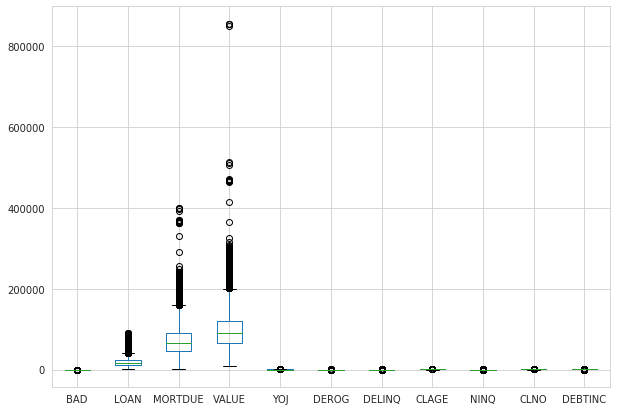

In [29]:
american.boxplot(figsize=(10,7));

We can see that there are outlier values in the dataset. We will look at each feature independently to get more insight later.

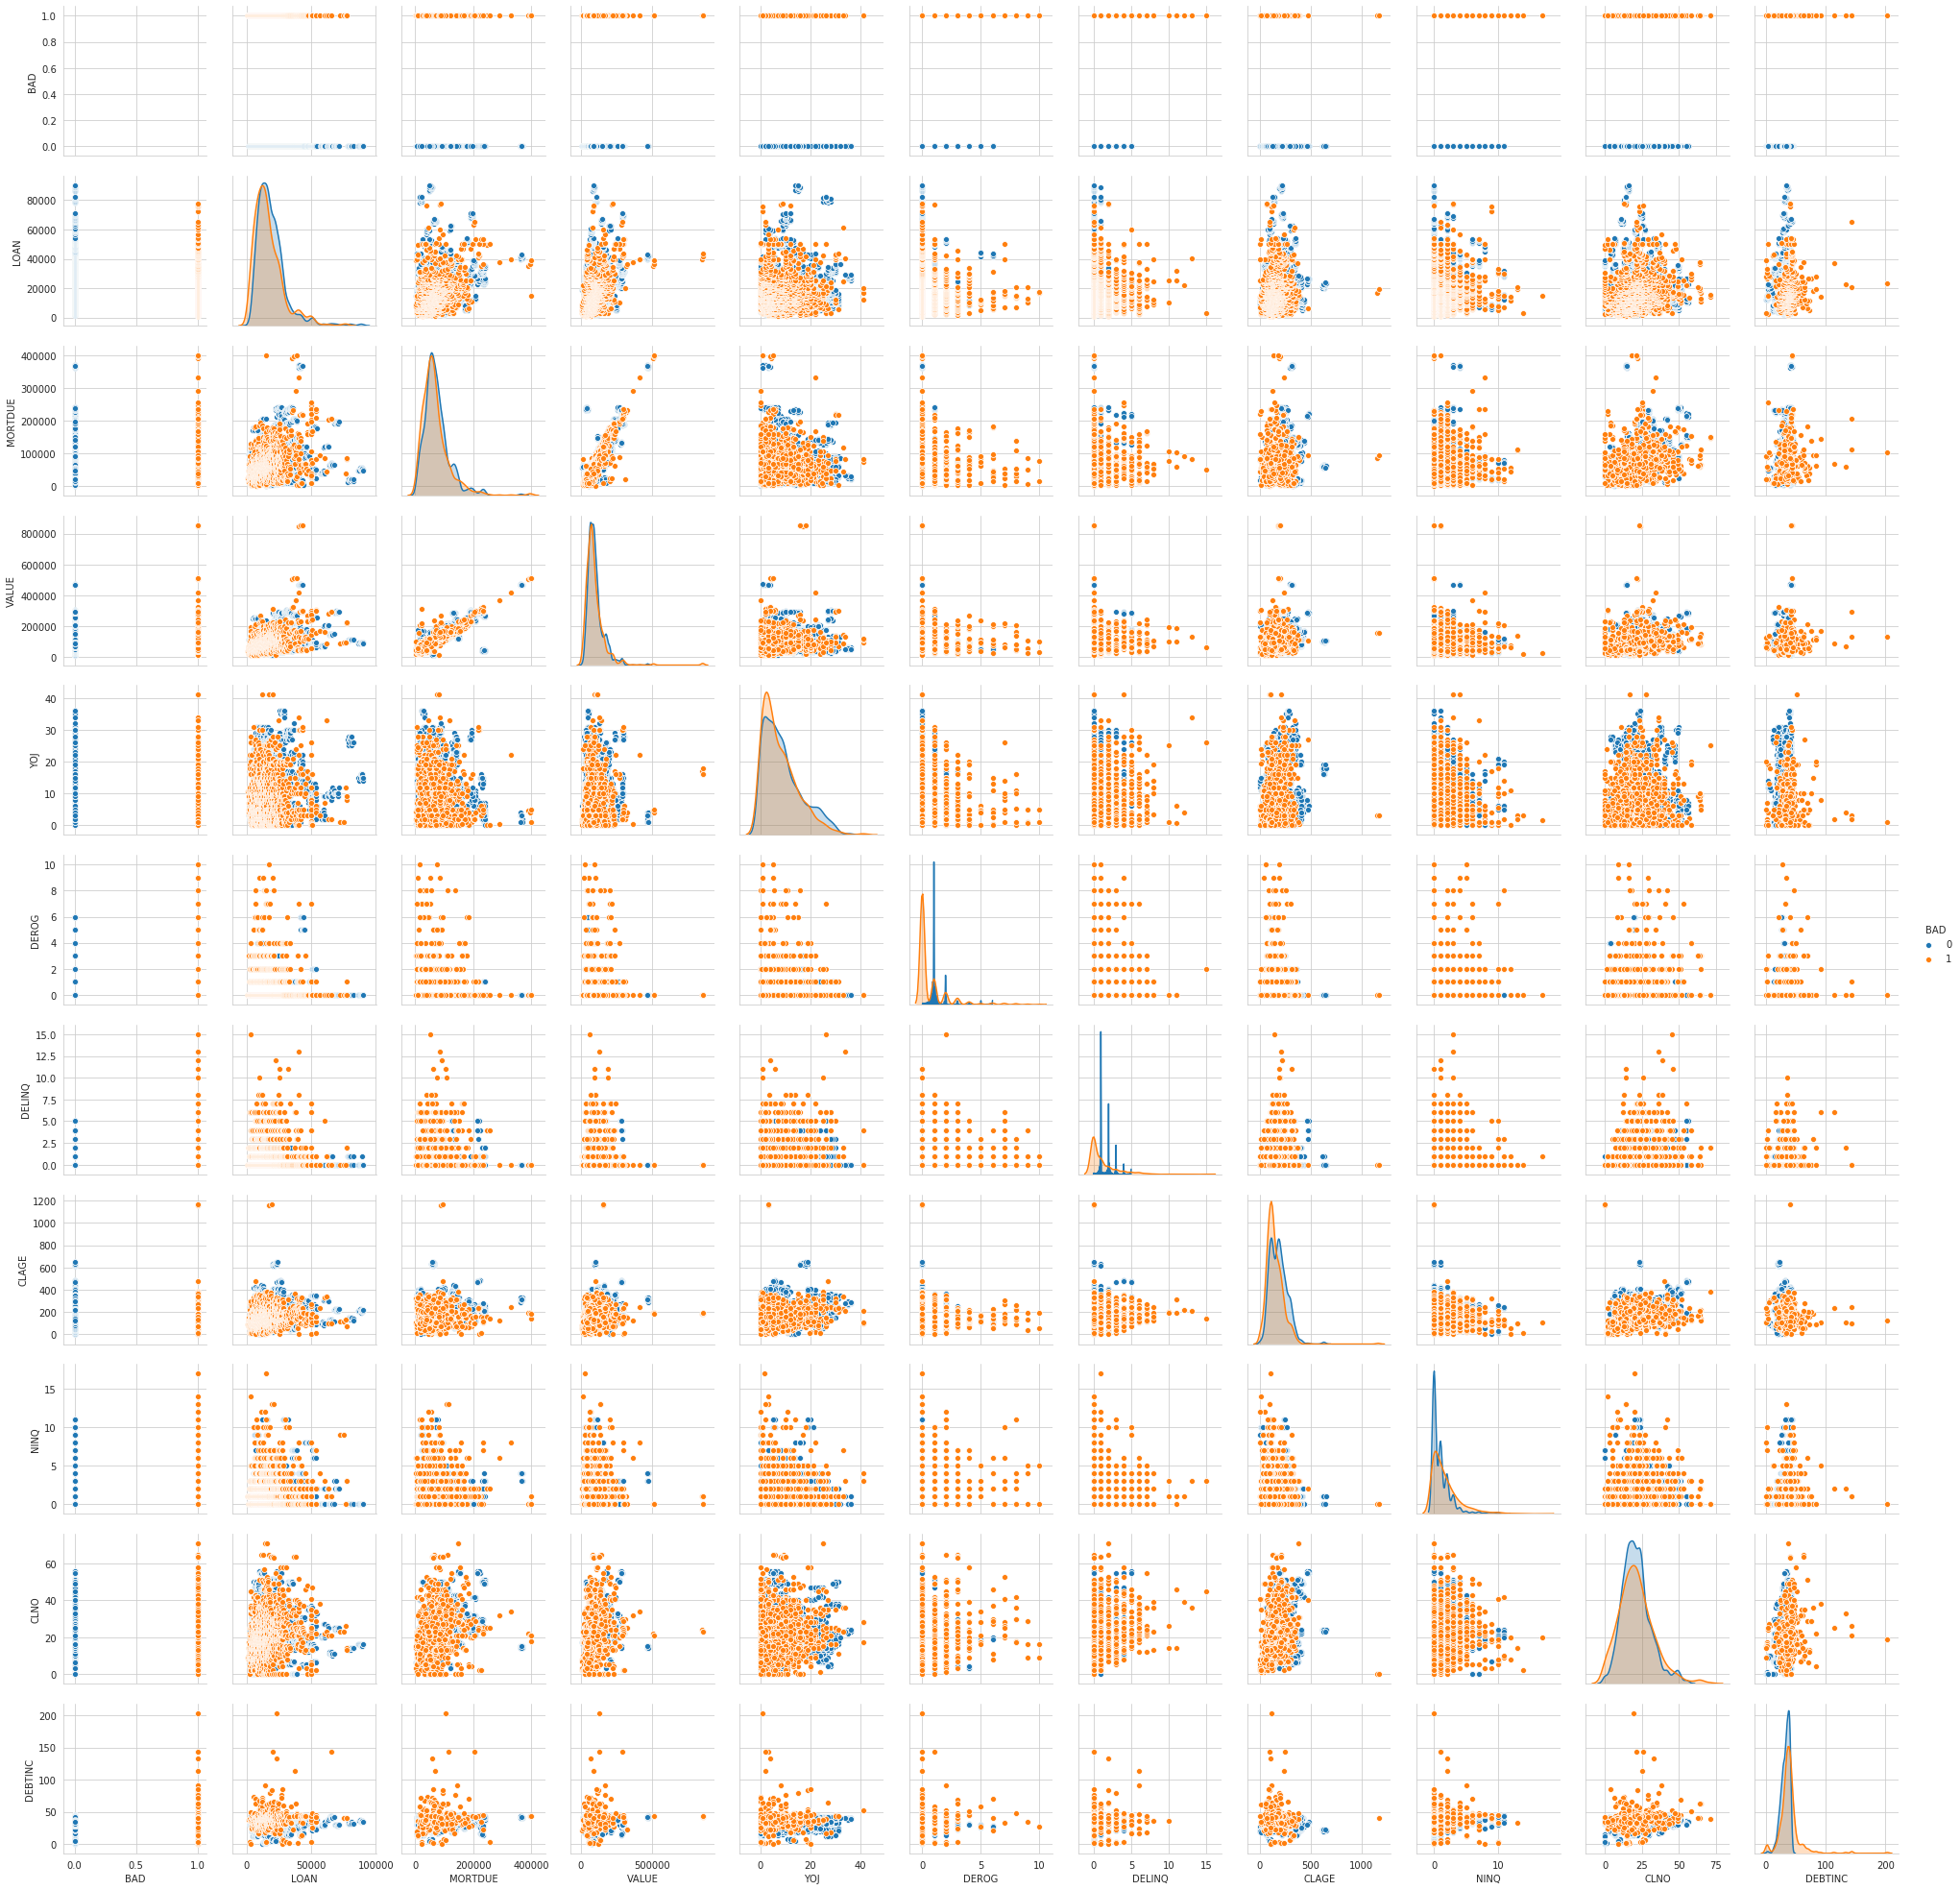

In [30]:
sns.pairplot(american, hue = "BAD");

We can already see that **MORTDUE** & **VALUE** have somewhat of a positive linear correlation.

Let us see the correlation index between each quantitative features :

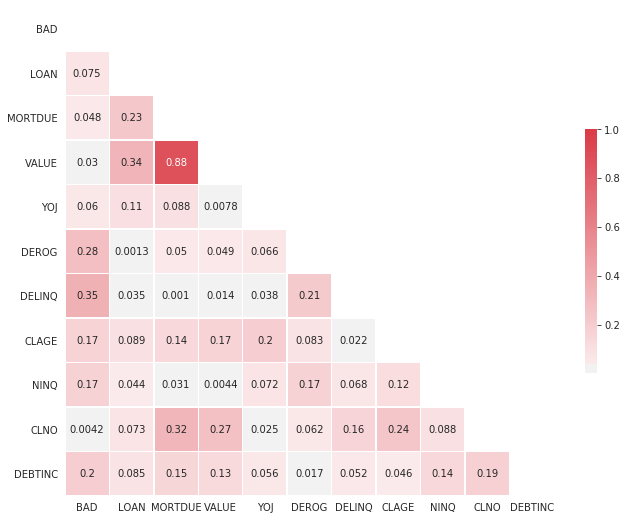

In [31]:
correlation = abs(american.corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

**MORTDUE** & **VALUE** have the highest correlation index of 0.87. This can be useful during the feature engineering phase.

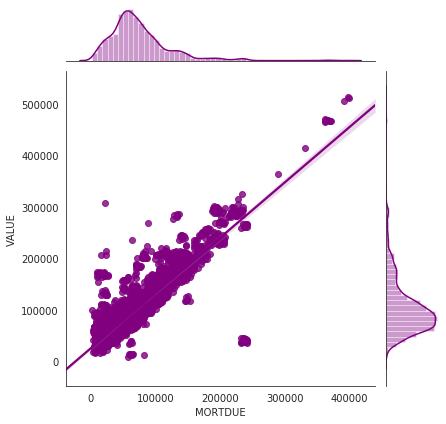

In [32]:
with sns.axes_style('white'):
    sns.jointplot("MORTDUE", "VALUE", american, kind='reg', color="purple")

## Plotting Categorical ~ Numerical

Now we are going to get an idea about the relation between some Categorical and numerical features.

1. **JOB** & **DEBTINC**

In [ ]:
#american.groupby(by="JOB").mean()["DEBTINC"].plot.bar();

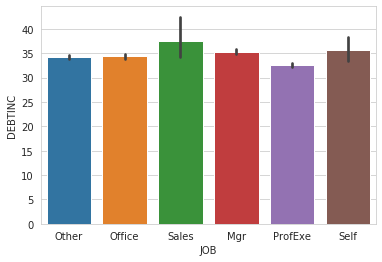

In [34]:
sns.barplot(x="JOB", y="DEBTINC", data=american);

According to that graph, the variable **JOB** doesn't have an influence on **DEBTINC** which is logical because customers want to get a loan that they can pay back.

In [ ]:
#american.groupby(by="JOB").sum()["DEBTINC"].plot.bar();

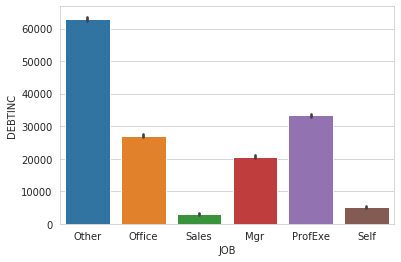

In [36]:
sns.barplot(x="JOB", y="DEBTINC", data=american, estimator=sum);

2. **JOB** & **LOAN**

In [ ]:
#american.groupby(by="JOB").mean()["LOAN"].plot.bar();

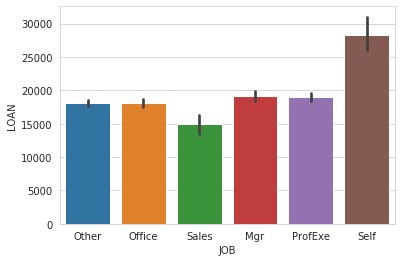

In [38]:
sns.barplot(x="JOB", y="LOAN", data=american);

Customers who are independent have the largest mean value of loan demands.

3. **JOB** & **VALUE**

By Mean :

In [ ]:
#american.groupby(by="JOB").mean()["VALUE"].plot.bar();

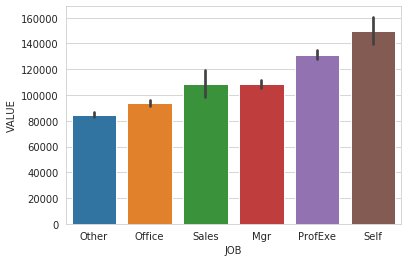

In [40]:
#american.groupby(by="JOB").mean()["LOAN"].plot.bar();
sns.barplot(x="JOB", y="VALUE", data=american);

By Sum :

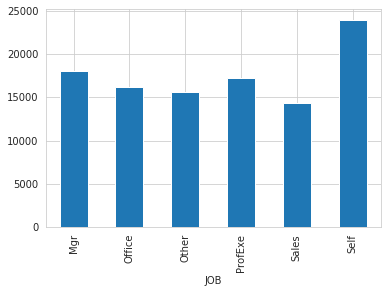

In [41]:
american.groupby(by="JOB").median()["LOAN"].plot.bar();
#sns.barplot(x="JOB", y="VALUE", data=american, estimator=sum);

According to the two plot above, people who are independent are the richest out of the available job, which is logical since they usually have businesses.

In [42]:
effectifs = american["JOB"].value_counts()
modalites = effectifs.index # The index of the effectifs contains the modalities

tab = pd.DataFrame(modalites, columns = ["JOB"]) # Creating an array with the modalities
tab["Effectif"] = effectifs.values
#tab["f"] = tab["n"] / len(american) # len(data) returns the size of the sample
tab["Mean_loan"] = american.groupby(by="JOB").mean()["LOAN"].values
tab["Mean_value"] = american.groupby(by="JOB").mean()["VALUE"].values
tab["Difference"] = tab["Mean_value"] - tab["Mean_loan"]
tab

JOB  Effectif     Mean_loan     Mean_value     Difference
0    Other      2388  19155.280313  108628.262697   89472.982384
1  ProfExe      1276  18142.616034   94081.816756   75939.200722
2   Office       948  18061.683417   84787.503377   66725.819960
3      Mgr       767  18983.463950  131118.204130  112134.740180
4     Self       193  14913.761468  108449.592593   93535.831125
5    Sales       109  28314.507772  149734.106383  121419.598611

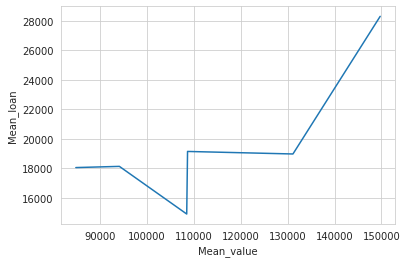

In [43]:
sns.lineplot(x="Mean_value", y="Mean_loan", data=tab);

1. **REASON** & **DEBTINC**

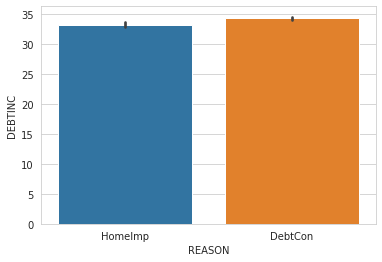

In [44]:
sns.barplot(x="REASON", y="DEBTINC", data=american);

2. **REASON** & **VALUE**

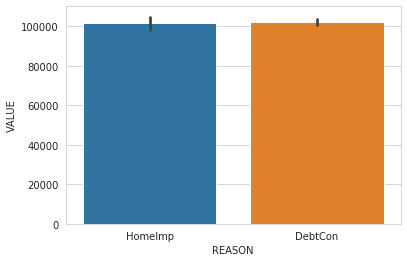

In [45]:
sns.barplot(x="REASON", y="VALUE", data=american);

3. **REASON** & **LOAN**

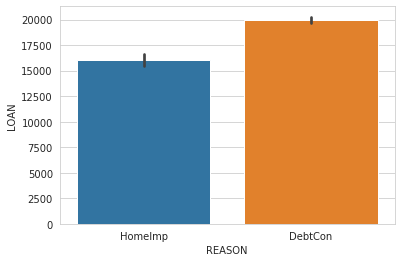

In [46]:
sns.barplot(x="REASON", y="LOAN", data=american);

People take higher loan values for debt consolidation than for Home Improvement reasons.

## Plotting Qualitative ~ Qualitative

Do the jobs count vary according to the reason of loan ?

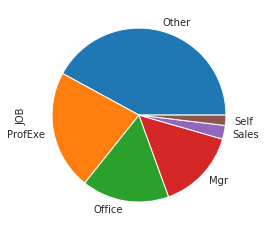

In [47]:
american[american["REASON"] == "DebtCon"]["JOB"].value_counts(normalize=True).plot(kind='pie');

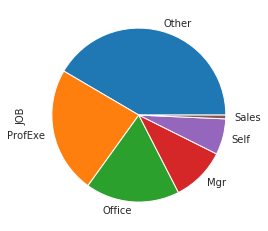

In [48]:
american[american["REASON"] == "HomeImp"]["JOB"].value_counts(normalize=True).plot(kind='pie');

No, the proportions are almost similar, so the job count does not change for the reason of loan.

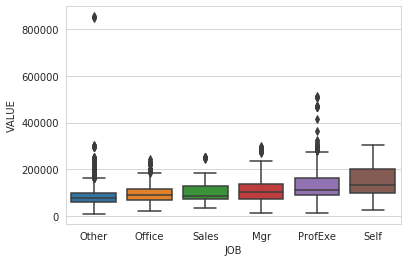

In [49]:
sns.boxplot(data=american, x="JOB", y="VALUE");

## Numerical Values

Now we are going to look at the distributions of each feature to get more insight on what to do during data cleaning :

1. BAD

In [50]:
american["BAD"].unique()

array([1, 0])

In [51]:
american["BAD"].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

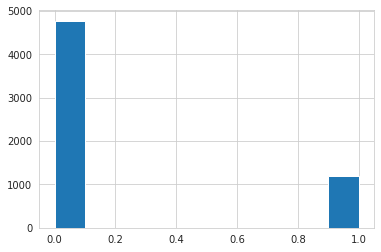

In [52]:
american["BAD"].hist();

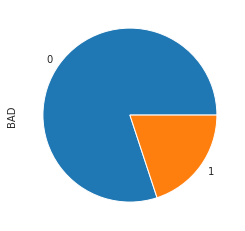

In [53]:
american["BAD"].value_counts(normalize=True).plot(kind='pie');

The target value's modalities are not balanced, this will help us during the choice of our evaluation metric.

2. LOAN

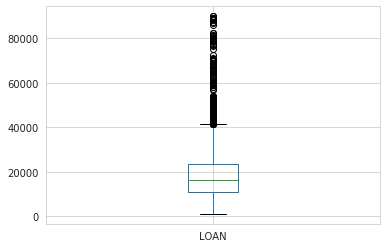

In [54]:
american[["LOAN"]].boxplot();

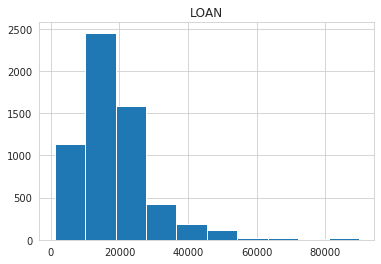

In [55]:
american[["LOAN"]].hist();

In [56]:
american["LOAN"].describe()

count     5960.000000
mean     18607.969799
std      11207.480417
min       1100.000000
25%      11100.000000
50%      16300.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64

3. MORTDUE

In [57]:
american["MORTDUE"].isna().sum()

518

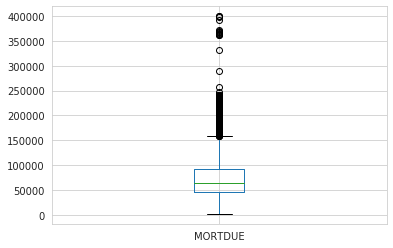

In [58]:
american[["MORTDUE"]].boxplot();

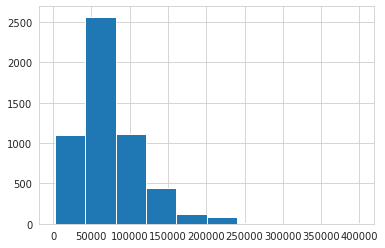

In [59]:
american["MORTDUE"].hist();

4. VALUE

In [60]:
american["VALUE"].isna().sum()

112

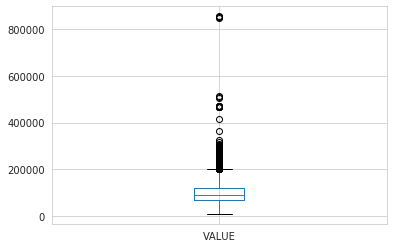

In [61]:
american[["VALUE"]].boxplot();

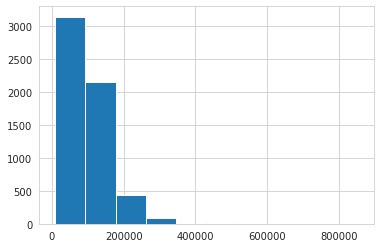

In [62]:
american["VALUE"].hist();

5. REASON

In [63]:
american["REASON"].isna().sum()

252

In [64]:
american["REASON"].unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

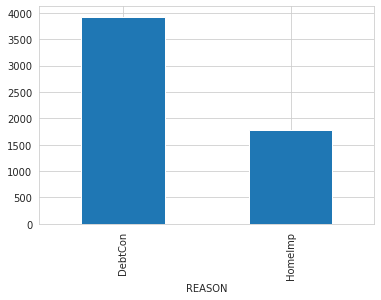

In [65]:
american.groupby("REASON").size().plot(kind='bar');

In [66]:
american["REASON"].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

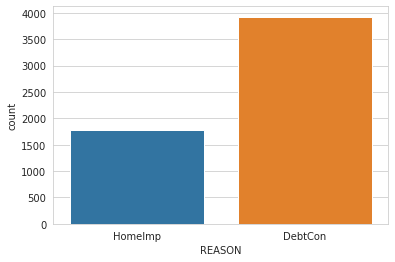

In [67]:
sns.countplot(data=american, x="REASON");

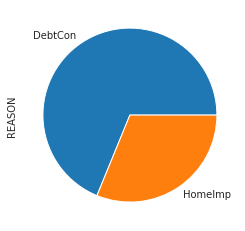

In [68]:
american["REASON"].value_counts(normalize=True).plot(kind='pie');

6. JOB

In [69]:
american["JOB"].isna().sum()

279

In [70]:
american["JOB"].unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

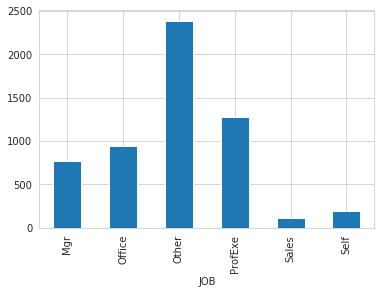

In [71]:
american.groupby("JOB").size().plot(kind='bar');

In [72]:
american["JOB"].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

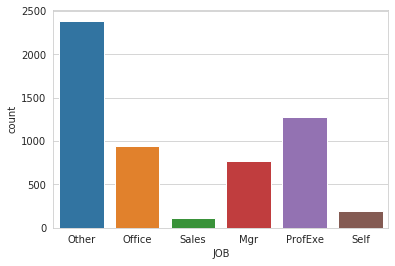

In [73]:
sns.countplot(data=american, x="JOB");

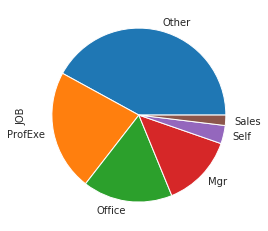

In [74]:
american["JOB"].value_counts(normalize=True).plot(kind='pie');

7. YOJ (Years at current job)

In [75]:
american["YOJ"].isna().sum()

515

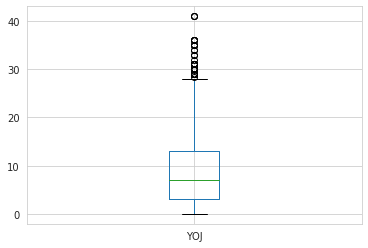

In [76]:
american[["YOJ"]].boxplot();

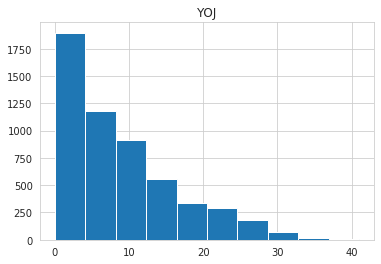

In [77]:
american[["YOJ"]].hist();

8. DEROG

In [78]:
american["DEROG"].isna().sum()

708

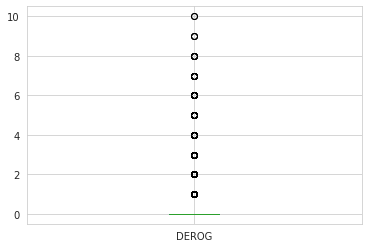

In [79]:
american[["DEROG"]].boxplot();

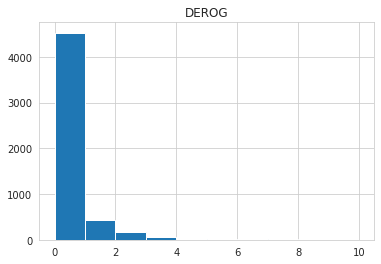

In [80]:
american[["DEROG"]].hist(); # This expplains the outlier values !

9. DELINQ

In [81]:
american["DELINQ"].isna().sum()

580

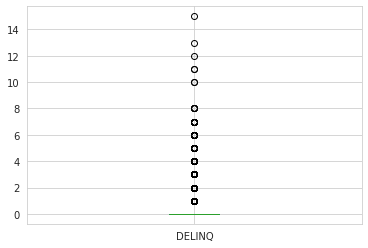

In [82]:
american[["DELINQ"]].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f972b8c0668>]],
      dtype=object)

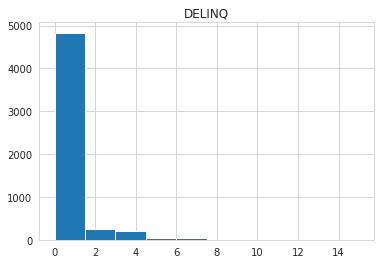

In [83]:
american[["DELINQ"]].hist()

In [84]:
american["DELINQ"].value_counts()

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
13.0       1
12.0       1
15.0       1
Name: DELINQ, dtype: int64

10. CLAGE

In [85]:
american["CLAGE"].isna().sum()

308

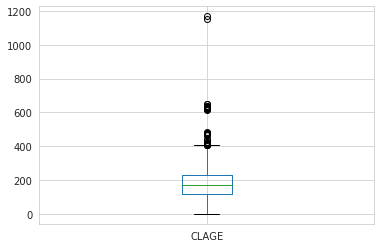

In [86]:
american[["CLAGE"]].boxplot();

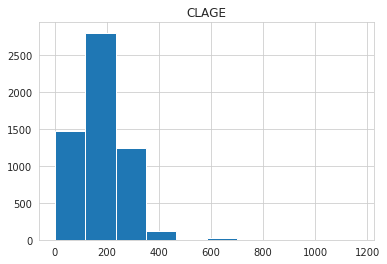

In [87]:
american[["CLAGE"]].hist();

11. NINQ

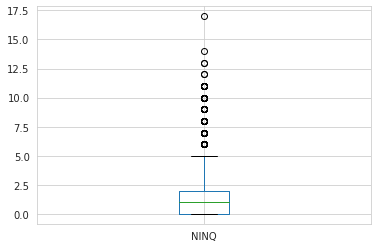

In [88]:
american[["NINQ"]].boxplot();

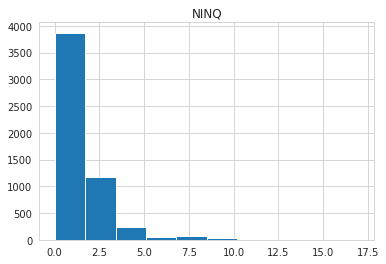

In [89]:
american[["NINQ"]].hist();

In [90]:
american["NINQ"].value_counts()

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
13.0       2
12.0       2
17.0       1
14.0       1
Name: NINQ, dtype: int64

12. CLNO

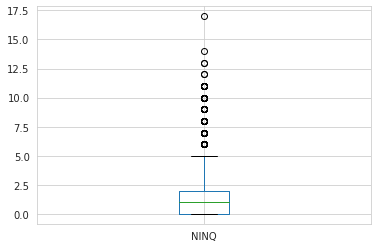

In [91]:
american[["NINQ"]].boxplot();

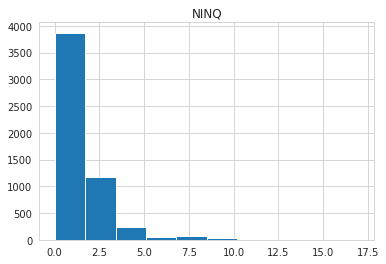

In [92]:
american[["NINQ"]].hist();

In [93]:
american["NINQ"].value_counts()

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
13.0       2
12.0       2
17.0       1
14.0       1
Name: NINQ, dtype: int64

13. DEBTINC

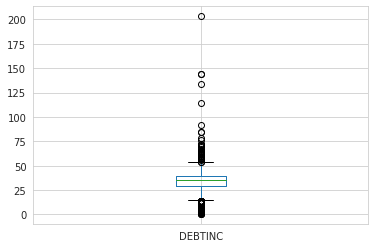

In [94]:
american[["DEBTINC"]].boxplot();

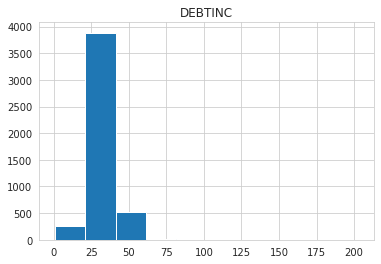

In [95]:
american[["DEBTINC"]].hist();

# Data Preprocessing

## Method 1 (Median, Most Frequent, StandardScaler)

### 1. Continuous

In [ ]:
with_median = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='median')
)
median_vars = ["LOAN", "MORTDUE", "VALUE", "DEBTINC", "CLAGE"]
american[median_vars] = with_median.fit_transform(american[median_vars])

### 2. Discrete

In [ ]:
# Converting Discrete columns to type object
discrete_columns = ["REASON", "JOB", "DEROG", "DELINQ", "NINQ", "CLNO", "YOJ"]
american[discrete_columns] = american[discrete_columns].astype(object)

In [98]:
american.dtypes

BAD          int64
LOAN       float64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ         object
DEROG       object
DELINQ      object
CLAGE      float64
NINQ        object
CLNO        object
DEBTINC    float64
dtype: object

In [99]:
discrete_columns

['REASON', 'JOB', 'DEROG', 'DELINQ', 'NINQ', 'CLNO', 'YOJ']

In [ ]:
most_frequent = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent')
)
most_frquent_value_vars = discrete_columns
american[discrete_columns] = most_frequent.fit_transform(american[discrete_columns])

In [101]:
american.head()

BAD    LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500.0  65019.0   89235.5  DebtCon   Other   0.0    0.0     0.0   
4    0  1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0  34.818262  
1  121.833333   0.0  14.0  34.818262  
2  149.466667   1.0  10.0  34.818262  
3  173.466667   0.0  16.0  34.818262  
4   93.333333   0.0  14.0  34.818262

In [102]:
american.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [ ]:
std_scaling = make_pipeline(
    StandardScaler()
)
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
american[std_vars] = std_scaling.fit_transform(american[std_vars])

minmax_scaling = make_pipeline(
    MinMaxScaler()
)
minmax_vars = ["YOJ"]
american[minmax_vars] = minmax_scaling.fit_transform(american[minmax_vars])

In [104]:
american.head()

BAD      LOAN   MORTDUE     VALUE   REASON     JOB       YOJ  DEROG  \
0    1 -1.562299 -1.107920 -1.099371  HomeImp   Other  0.256098    0.0   
1    1 -1.544453 -0.069286 -0.582794  HomeImp   Other  0.170732    0.0   
2    1 -1.526606 -1.398407 -1.491970  HomeImp   Other  0.097561    0.0   
3    1 -1.526606 -0.187596 -0.216389  DebtCon   Other  0.000000    0.0   
4    0 -1.508759  0.582831  0.183939  HomeImp  Office  0.073171    0.0   

   DELINQ     CLAGE  NINQ  CLNO   DEBTINC  
0     0.0 -1.018026   1.0   9.0  0.106963  
1     2.0 -0.689350   0.0  14.0  0.106963  
2     0.0 -0.358680   1.0  10.0  0.106963  
3     0.0 -0.071488   0.0  16.0  0.106963  
4     0.0 -1.030391   0.0  14.0  0.106963

## Method 2 (Median, Most Frequent, RobustScaler)

In [ ]:
american2 = pd.read_csv("Bank_of_America_data.csv")
with_median = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='median')
)
median_vars = ["LOAN", "MORTDUE", "VALUE", "DEBTINC", "CLAGE"]
american2[median_vars] = with_median.fit_transform(american2[median_vars])
# Converting Discrete columns to type object
discrete_columns = ["REASON", "JOB", "DEROG", "DELINQ", "NINQ", "CLNO", "YOJ"]
american2[discrete_columns] = american2[discrete_columns].astype(object)
most_frequent = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent')
)
most_frquent_value_vars = discrete_columns
american2[discrete_columns] = most_frequent.fit_transform(american2[discrete_columns])
std_scaling = make_pipeline(
    RobustScaler()
)
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
american2[std_vars] = std_scaling.fit_transform(american2[std_vars])

minmax_scaling = make_pipeline(
    MinMaxScaler()
)
minmax_vars = ["YOJ"]
american2[minmax_vars] = minmax_scaling.fit_transform(american2[minmax_vars])

## Method 3 (Mean, Most Frequent, StandardScaler)

In [ ]:
american3 = pd.read_csv("Bank_of_America_data.csv")
with_median = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean')
)
median_vars = ["LOAN", "MORTDUE", "VALUE", "DEBTINC", "CLAGE"]
american3[median_vars] = with_median.fit_transform(american3[median_vars])
# Converting Discrete columns to type object
discrete_columns = ["REASON", "JOB", "DEROG", "DELINQ", "NINQ", "CLNO", "YOJ"]
american3[discrete_columns] = american3[discrete_columns].astype(object)
most_frequent = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent')
)
most_frquent_value_vars = discrete_columns
american3[discrete_columns] = most_frequent.fit_transform(american3[discrete_columns])
std_scaling = make_pipeline(
    StandardScaler()
)
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
american3[std_vars] = std_scaling.fit_transform(american3[std_vars])

minmax_scaling = make_pipeline(
    MinMaxScaler()
)
minmax_vars = ["YOJ"]
american3[minmax_vars] = minmax_scaling.fit_transform(american3[minmax_vars])

## Method 4 (Mean, Most Frequent, RobustScaler)

In [ ]:
american4 = pd.read_csv("Bank_of_America_data.csv")
with_median = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean')
)
median_vars = ["LOAN", "MORTDUE", "VALUE", "DEBTINC", "CLAGE"]
american4[median_vars] = with_median.fit_transform(american4[median_vars])
# Converting Discrete columns to type object
discrete_columns = ["REASON", "JOB", "DEROG", "DELINQ", "NINQ", "CLNO", "YOJ"]
american4[discrete_columns] = american4[discrete_columns].astype(object)
most_frequent = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent')
)
most_frquent_value_vars = discrete_columns
american4[discrete_columns] = most_frequent.fit_transform(american4[discrete_columns])
std_scaling = make_pipeline(
    RobustScaler()
)
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
american4[std_vars] = std_scaling.fit_transform(american4[std_vars])

minmax_scaling = make_pipeline(
    MinMaxScaler()
)
minmax_vars = ["YOJ"]
american4[minmax_vars] = minmax_scaling.fit_transform(american4[minmax_vars])

## Correlations

### Method 1

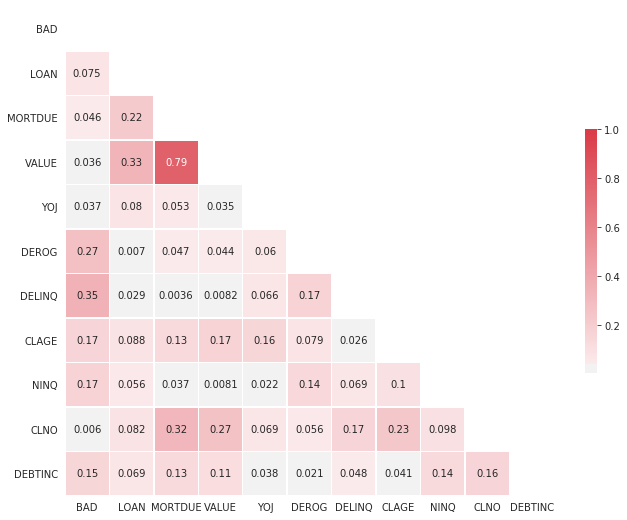

In [108]:
correlation = abs(american.corr())
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

### Method 2

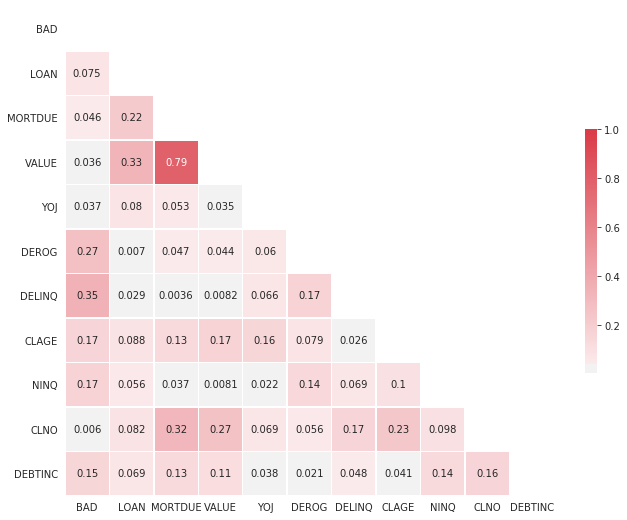

In [109]:
correlation2 = abs(american2.corr())
mask = np.zeros_like(correlation2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation2, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

### Method 3

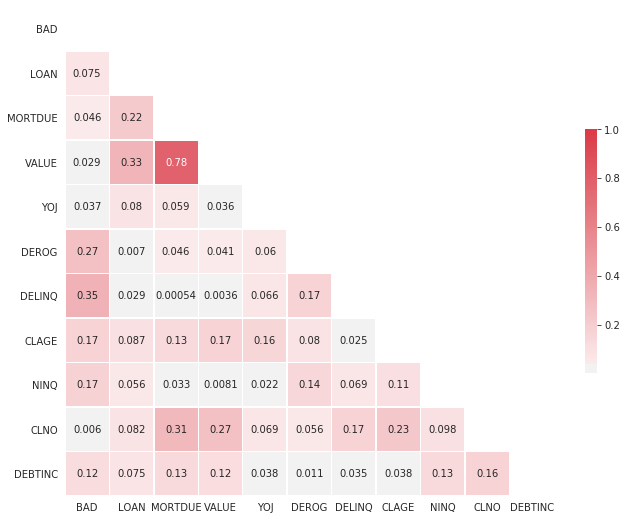

In [110]:
correlation3 = abs(american3.corr())
mask = np.zeros_like(correlation3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation3, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

### Method 4

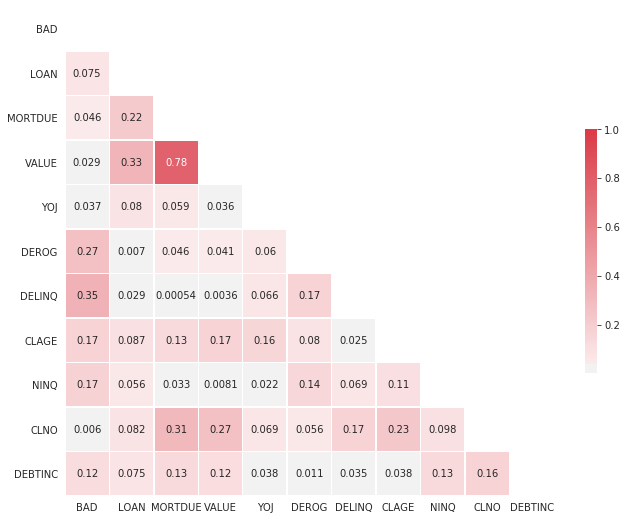

In [111]:
correlation4 = abs(american4.corr())
mask = np.zeros_like(correlation4, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation4, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

### Method 5

#### DEBTINC Feature Prediction
For this, we will make a seperate machine learning regression model to fill the missing values. So we will create a new dataframe setting the target variable as **DEBTINC**.

[21:05:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:05:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:05:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:05:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:05:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RMSE
RandomForest    5.891508e+00
LBGMRegressor   6.567453e+00
XGB             7.561542e+00
Ridge           7.975250e+00
Bayesian Ridge  7.990742e+00
AdaBoost        8.716325e+00
Linear          4.382215e+12

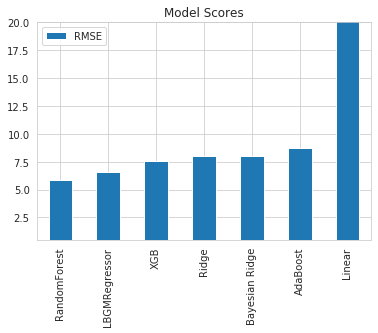

In [112]:
american = pd.read_csv("Bank_of_America_data.csv")
with_median = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='median')
)
median_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE"]
american[median_vars] = with_median.fit_transform(american[median_vars])
discrete_columns = ["REASON", "JOB", "DEROG", "DELINQ", "NINQ", "CLNO", "YOJ"]
american[discrete_columns] = american[discrete_columns].astype(object)
most_frequent = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent')
)
most_frquent_value_vars = discrete_columns
american[discrete_columns] = most_frequent.fit_transform(american[discrete_columns])
std_scaling = make_pipeline(
    StandardScaler()
)
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE"]
american[std_vars] = std_scaling.fit_transform(american[std_vars])

minmax_scaling = make_pipeline(
    MinMaxScaler()
)
minmax_vars = ["YOJ"]
american[minmax_vars] = minmax_scaling.fit_transform(american[minmax_vars])

# DEBTINC
df = american.copy()
#df.drop("BAD", axis=1, inplace=True)
df.dropna(subset=["DEBTINC"], inplace=True)
y_reg = df["DEBTINC"]
df.drop("DEBTINC", axis=1, inplace=True)
X_reg = df.copy()
# Converting Discrete columns to type str
discrete_columns = ["REASON", "JOB", "DEROG", "DELINQ", "NINQ", "CLNO"]
X_reg[discrete_columns] = X_reg[discrete_columns].astype(str)
X_reg = pd.get_dummies(X_reg, drop_first=True)
#PCA
pca = PCA(n_components=102)
ss = StandardScaler()
ss.fit(X_reg)
X_scaled_reg = ss.transform(X_reg)
X_transformed_pca_reg = pca.fit_transform(X_scaled_reg)

def evaluate(train,target_train):
    results={}
    def test_model(clf):
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        mse = make_scorer(mean_squared_error)
        mse_val_score = cross_val_score(clf, train, target_train, cv=cv,scoring=mse)
        mse_val_score = np.sqrt(mse_val_score)
        scores=[mse_val_score.mean()]
        return scores
    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    clf = xgb.XGBRegressor()
    results["XGB"]=test_model(clf)
    clf = LGBMRegressor()
    results["LBGMRegressor"]=test_model(clf)
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["RMSE"] 
    results.sort_values('RMSE', inplace=True)
    #results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,20])
    return results

evaluate(X_reg,y_reg)

It appears that the best regression model (lowest RMSE Score) we can use to replace the missing values for **DEBTINC** is : **Random Forest**.
Let's apply it right now :

In [ ]:
american5 = pd.read_csv("Bank_of_America_data.csv")
with_median = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='median')
)
median_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE"]
american5[median_vars] = with_median.fit_transform(american5[median_vars])
discrete_columns = ["DEROG", "DELINQ", "NINQ", "CLNO", "YOJ"]
american5[discrete_columns] = american5[discrete_columns].astype(object)
most_frequent = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent')
)
most_frquent_value_vars = discrete_columns
american5[discrete_columns] = most_frequent.fit_transform(american5[discrete_columns])
std_scaling = make_pipeline(
    StandardScaler()
)
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE"]
american5[std_vars] = std_scaling.fit_transform(american5[std_vars])

minmax_scaling = make_pipeline(
    MinMaxScaler()
)
minmax_vars = ["YOJ"]
american5[minmax_vars] = minmax_scaling.fit_transform(american5[minmax_vars])
# Encoding for regression model only
  # Job
american5["JOB"].fillna("Unspecified_Job", inplace=True)
  # Reason
american5["REASON"].fillna("Unspecified_Reason", inplace=True)
american5 = pd.get_dummies(american5).copy()

In [114]:
american5.head()

BAD      LOAN   MORTDUE     VALUE       YOJ  DEROG  DELINQ     CLAGE  NINQ  \
0    1 -1.562299 -1.107920 -1.099371  0.256098    0.0     0.0 -1.018026   1.0   
1    1 -1.544453 -0.069286 -0.582794  0.170732    0.0     2.0 -0.689350   0.0   
2    1 -1.526606 -1.398407 -1.491970  0.097561    0.0     0.0 -0.358680   1.0   
3    1 -1.526606 -0.187596 -0.216389  0.000000    0.0     0.0 -0.071488   0.0   
4    0 -1.508759  0.582831  0.183939  0.073171    0.0     0.0 -1.030391   0.0   

   CLNO  DEBTINC  REASON_DebtCon  REASON_HomeImp  REASON_Unspecified_Reason  \
0   9.0      NaN               0               1                          0   
1  14.0      NaN               0               1                          0   
2  10.0      NaN               0               1                          0   
3  16.0      NaN               0               0                          1   
4  14.0      NaN               0               1                          0   

   JOB_Mgr  JOB_Office  JOB_Other  JOB_ProfExe  JOB_Sales  JOB_Self  \
0        0           0          1            0          0         0   
1        0           0          1            0          0         0   
2        0           0          1            0          0         0   
3        0           0          0            0          0         0   
4        0           1          0            0          0         0   

   JOB_Unspecified_Job  
0                    0  
1                    0  
2                    0  
3                    1  
4                    0

In [ ]:
df = american5.copy()
df.drop("BAD", axis=1, inplace=True)
df.dropna(subset=["DEBTINC"], inplace=True)
y_debt = df["DEBTINC"]
df.drop("DEBTINC", axis=1, inplace=True)
X_debt = df.copy()

In [116]:
pd.set_option('display.max_columns', 50)
X_debt.head()

LOAN   MORTDUE     VALUE       YOJ  DEROG  DELINQ     CLAGE  NINQ  \
5  -1.508759 -0.997741 -1.076598  0.219512    0.0     0.0 -0.933073   1.0   
7  -1.499836 -1.045827 -1.028871  0.268293    0.0     0.0 -1.085045   0.0   
17 -1.464142 -1.174431 -0.216389  0.463415    0.0     0.0 -0.071488   0.0   
19 -1.455219  0.690236  0.341383  0.048780    0.0     0.0 -1.058402   0.0   
25 -1.446296 -0.896329 -0.950843  0.292683    0.0     0.0 -1.303729   1.0   

    CLNO  REASON_DebtCon  REASON_HomeImp  REASON_Unspecified_Reason  JOB_Mgr  \
5    8.0               0               1                          0        0   
7    8.0               0               1                          0        0   
17  16.0               0               0                          1        0   
19  13.0               0               1                          0        0   
25  21.0               0               1                          0        1   

    JOB_Office  JOB_Other  JOB_ProfExe  JOB_Sales  JOB_Self  \
5            0          1            0          0         0   
7            0          1            0          0         0   
17           0          0            0          0         0   
19           1          0            0          0         0   
25           0          0            0          0         0   

    JOB_Unspecified_Job  
5                     0  
7                     0  
17                    1  
19                    0  
25                    0

In [ ]:
reg = RandomForestRegressor()
reg.fit(X_debt, y_debt);

In [ ]:
for _,row in american5.iterrows():
    if np.isnan(row["DEBTINC"]):
        data  = pd.Series(np.array([row["LOAN"],row["MORTDUE"],row["VALUE"],row["YOJ"],row["DEROG"],row["DELINQ"],
                                   row["CLAGE"],row["NINQ"],row["CLNO"],row["REASON_DebtCon"],row["REASON_HomeImp"],row["REASON_Unspecified_Reason"],
                                   row["JOB_Mgr"],row["JOB_Office"],row["JOB_Other"],
                                   row["JOB_ProfExe"],row["JOB_Sales"],row["JOB_Self"], row["JOB_Unspecified_Job"]]))
        american5.loc[_,'DEBTINC'] = reg.predict([data])[0]

In [119]:
american5.isna().sum()

BAD                          0
LOAN                         0
MORTDUE                      0
VALUE                        0
YOJ                          0
DEROG                        0
DELINQ                       0
CLAGE                        0
NINQ                         0
CLNO                         0
DEBTINC                      0
REASON_DebtCon               0
REASON_HomeImp               0
REASON_Unspecified_Reason    0
JOB_Mgr                      0
JOB_Office                   0
JOB_Other                    0
JOB_ProfExe                  0
JOB_Sales                    0
JOB_Self                     0
JOB_Unspecified_Job          0
dtype: int64

In [ ]:
correlation5 = american5.corr()

In [121]:
matrices = [correlation, correlation2, correlation3, correlation4, correlation5]
for i in matrices:
    mat = np.matrix(i)
    print(str(sum(mat[:,1])))

[[2.03311251]]
[[2.03311251]]
[[2.03769383]]
[[2.03769383]]
[[1.85941457]]


It looks like the best method was  **Method 4**.

## Features Engineering

These are the current correlations that we have :

In [ ]:
data = american4.copy()

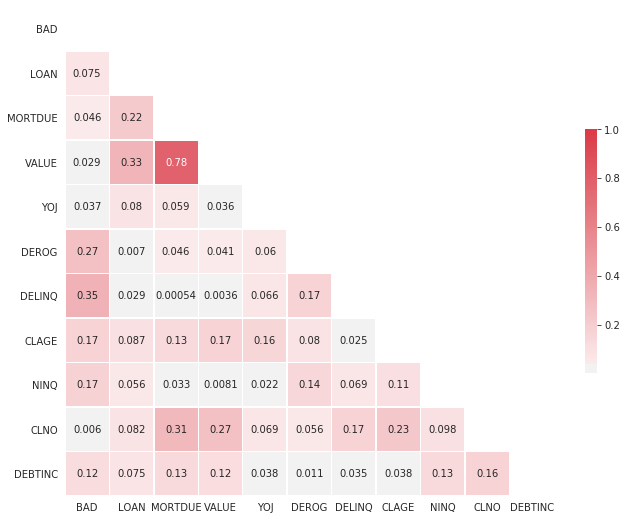

In [123]:
data_corr = abs(data.corr())
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [ ]:
data.drop(["YOJ", "VALUE", "LOAN", "MORTDUE", "CLNO"], axis=1, inplace=True)

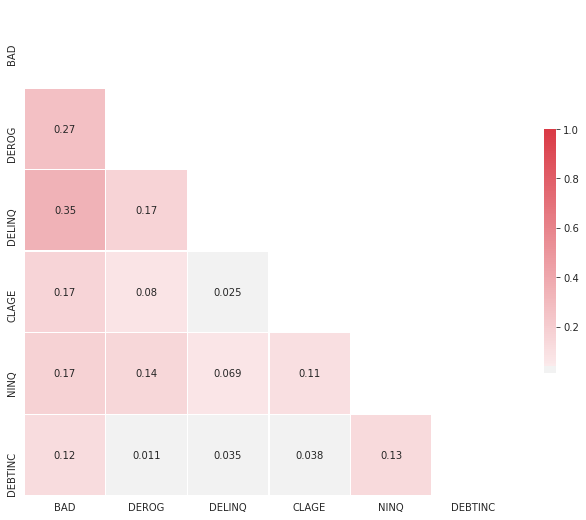

In [125]:
data_corr = abs(data.corr())
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

## Encoding

In [126]:
data.dtypes

BAD          int64
REASON      object
JOB         object
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
DEBTINC    float64
dtype: object

In [127]:
discrete_columns = ["DEROG", "DELINQ", "NINQ", "REASON", "JOB"]
data[discrete_columns] = data[discrete_columns].astype(object)
data.dtypes

BAD          int64
REASON      object
JOB         object
DEROG       object
DELINQ      object
CLAGE      float64
NINQ        object
DEBTINC    float64
dtype: object

In [128]:
data = pd.get_dummies(data, drop_first=True)
data.head()

BAD     CLAGE  DEBTINC  REASON_HomeImp  JOB_Office  JOB_Other  JOB_ProfExe  \
0    1 -0.762577      0.0               1           0          1            0   
1    1 -0.512361      0.0               1           0          1            0   
2    1 -0.260626      0.0               1           0          1            0   
3    1  0.015398      0.0               0           0          1            0   
4    0 -0.771991      0.0               1           1          0            0   

   JOB_Sales  JOB_Self  DEROG_1.0  DEROG_2.0  DEROG_3.0  DEROG_4.0  DEROG_5.0  \
0          0         0          0          0          0          0          0   
1          0         0          0          0          0          0          0   
2          0         0          0          0          0          0          0   
3          0         0          0          0          0          0          0   
4          0         0          0          0          0          0          0   

   DEROG_6.0  DEROG_7.0  DEROG_8.0  DEROG_9.0  DEROG_10.0  DELINQ_1.0  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   DELINQ_2.0  DELINQ_3.0  DELINQ_4.0  DELINQ_5.0  DELINQ_6.0  DELINQ_7.0  \
0           0           0           0           0           0           0   
1           1           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   DELINQ_8.0  DELINQ_10.0  DELINQ_11.0  DELINQ_12.0  DELINQ_13.0  \
0           0            0            0            0            0   
1           0            0            0            0            0   
2           0            0            0            0            0   
3           0            0            0            0            0   
4           0            0            0            0            0   

   DELINQ_15.0  NINQ_1.0  NINQ_2.0  NINQ_3.0  NINQ_4.0  NINQ_5.0  NINQ_6.0  \
0            0         1         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         1         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   

   NINQ_7.0  NINQ_8.0  NINQ_9.0  NINQ_10.0  NINQ_11.0  NINQ_12.0  NINQ_13.0  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          0          0   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         0         0         0          0          0          0          0   

   NINQ_14.0  NINQ_17.0  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0

In [129]:
data.shape

(5960, 47)

## PCA

In [130]:
X = data.drop("BAD", axis=1)
y = data["BAD"].copy()
X.head()

CLAGE  DEBTINC  REASON_HomeImp  JOB_Office  JOB_Other  JOB_ProfExe  \
0 -0.762577      0.0               1           0          1            0   
1 -0.512361      0.0               1           0          1            0   
2 -0.260626      0.0               1           0          1            0   
3  0.015398      0.0               0           0          1            0   
4 -0.771991      0.0               1           1          0            0   

   JOB_Sales  JOB_Self  DEROG_1.0  DEROG_2.0  DEROG_3.0  DEROG_4.0  DEROG_5.0  \
0          0         0          0          0          0          0          0   
1          0         0          0          0          0          0          0   
2          0         0          0          0          0          0          0   
3          0         0          0          0          0          0          0   
4          0         0          0          0          0          0          0   

   DEROG_6.0  DEROG_7.0  DEROG_8.0  DEROG_9.0  DEROG_10.0  DELINQ_1.0  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   DELINQ_2.0  DELINQ_3.0  DELINQ_4.0  DELINQ_5.0  DELINQ_6.0  DELINQ_7.0  \
0           0           0           0           0           0           0   
1           1           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   DELINQ_8.0  DELINQ_10.0  DELINQ_11.0  DELINQ_12.0  DELINQ_13.0  \
0           0            0            0            0            0   
1           0            0            0            0            0   
2           0            0            0            0            0   
3           0            0            0            0            0   
4           0            0            0            0            0   

   DELINQ_15.0  NINQ_1.0  NINQ_2.0  NINQ_3.0  NINQ_4.0  NINQ_5.0  NINQ_6.0  \
0            0         1         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         1         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   

   NINQ_7.0  NINQ_8.0  NINQ_9.0  NINQ_10.0  NINQ_11.0  NINQ_12.0  NINQ_13.0  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          0          0   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         0         0         0          0          0          0          0   

   NINQ_14.0  NINQ_17.0  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0

In [131]:
pca = PCA(n_components=42)
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)
X_transformed_pca = pca.fit_transform(X_scaled)
pca_variance = pca.explained_variance_
explained_variance = pca.explained_variance_ratio_
sum(explained_variance.tolist()[0:42])

0.9537126744748605

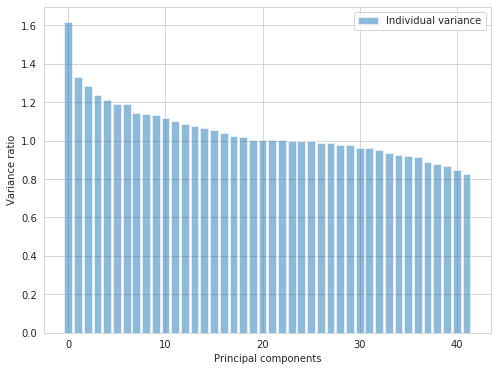

In [132]:
plt.figure(figsize=(8, 6))
plt.bar(range(42), pca_variance, alpha=0.5, align='center', label='Individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

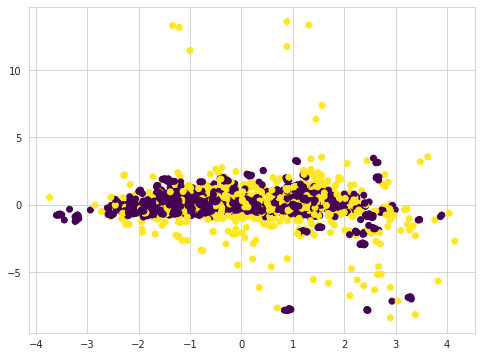

In [133]:
plt.figure(figsize=(8,6))
plt.scatter(X_transformed_pca[:,0], X_transformed_pca[:,41], c=data['BAD'], cmap='viridis')
plt.show()

## Machine Learning

In [ ]:
def evaluate(algo, X_train, Y_train, cv):
    # One Pass
    model = algo.fit(X_train, Y_train)
    acc = round(model.score(X_train, Y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    recall_cv = round(metrics.recall_score(Y_train, train_pred) * 100, 2)
    precision_cv = round(metrics.precision_score(Y_train, train_pred) * 100, 2)
    f1_cv = round(metrics.f1_score(Y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv, recall_cv, precision_cv, f1_cv

def fit_ml_algo(algo, X_train, y_train, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    recall_cv = round(metrics.recall_score(Y_train, train_pred) * 100, 2)
    precision_cv = round(metrics.precision_score(Y_train, train_pred) * 100, 2)
    f1_cv = round(metrics.f1_score(Y_train, train_pred) * 100, 2)
    
    print("Model used :", algo.best_estimator_)
    return train_pred, acc, acc_cv, recall_cv, precision_cv, f1_cv

def fit_ml_algo_ne(algo, X_train, Y_train, cv):
    # One Pass
    model = algo.fit(X_train, Y_train)
    acc = round(model.score(X_train, Y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    recall_cv = round(metrics.recall_score(Y_train, train_pred) * 100, 2)
    precision_cv = round(metrics.precision_score(Y_train, train_pred) * 100, 2)
    f1_cv = round(metrics.f1_score(Y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv, recall_cv, precision_cv, f1_cv

In [ ]:
X_train = X_transformed_pca
y_train = y

### Logistic Regression

In [136]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log, recall_cv_log, precision_cv_log, f1_cv_log = fit_ml_algo_ne(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Recall CV 10-Fold: %s" % recall_cv_log)
print("Precision CV 10-Fold: %s" % precision_cv_log)
print("F1 CV 10-Fold: %s" % f1_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: (1 Fold) 83.88
Accuracy CV 10-Fold: 83.07
Recall CV 10-Fold: 30.61
Precision CV 10-Fold: 66.42
F1 CV 10-Fold: 41.91
Running Time: 0:00:02.465545


### KNN

In [137]:
start_time = time.time()
knn_params = {'n_neighbors':list(range(1,15)), 'weights': ['distance', 'uniform']}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, knn_params, cv=5)
grid_search.fit(X_train, y_train)

train_pred_knn, acc_knn, acc_cv_knn, recall_cv_knn, precision_cv_knn, f1_cv_knn = fit_ml_algo_ne(grid_search.best_estimator_, X_train,y_train,10)
knn_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Recall CV 10-Fold: %s" % recall_cv_knn)
print("Precision CV 10-Fold: %s" % precision_cv_knn)
print("F1 CV 10-Fold: %s" % f1_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: (1 Fold) 84.36
Accuracy CV 10-Fold: 81.95
Recall CV 10-Fold: 25.99
Precision CV 10-Fold: 61.19
F1 CV 10-Fold: 36.48
Running Time: 0:00:34.894757


### Decision Tree

In [138]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt, recall_cv_dt, precision_cv_dt, f1_cv_dt = fit_ml_algo_ne(DecisionTreeClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
dt_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Recall CV 10-Fold: %s" % recall_cv_dt)
print("Precision CV 10-Fold: %s" % precision_cv_dt)
print("F1 CV 10-Fold: %s" % f1_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: (1 Fold) 99.65
Accuracy CV 10-Fold: 79.85
Recall CV 10-Fold: 57.95
Precision CV 10-Fold: 49.57
F1 CV 10-Fold: 53.43
Running Time: 0:00:03.781775


### Random Forest

In [139]:
rf_params = {'n_estimators': list(range(1,15))
            }

grid_search = GridSearchCV(RandomForestClassifier(), rf_params, cv=10)
grid_search.fit(X_train, y_train)

print("Best params : ",grid_search.best_params_)
start_time = time.time()

train_pred_rf, acc_rf, acc_cv_rf, recall_cv_rf, precision_cv_rf, f1_cv_rf = fit_ml_algo_ne(grid_search.best_estimator_,X_train,y_train,10)

rf_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Recall CV 10-Fold: %s" % recall_cv_rf)
print("Precision CV 10-Fold: %s" % precision_cv_rf)
print("F1 CV 10-Fold: %s" % f1_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Best params :  {'n_estimators': 12}
Accuracy: (1 Fold) 98.47
Accuracy CV 10-Fold: 84.56
Recall CV 10-Fold: 53.57
Precision CV 10-Fold: 63.38
F1 CV 10-Fold: 58.07
Running Time: 0:00:03.985814


### SGDC

In [140]:
sgdc_params = {"loss": ["hinge", "log"], "penalty": ["l1", "l2"], "max_iter": [1,2,3,4,5]}

start_time = time.time()

grid_search = GridSearchCV(SGDClassifier(), sgdc_params, cv=5)
grid_search.fit(X_train, y_train)

print("Best params : ",grid_search.best_params_)

train_pred_sgdc, acc_sgdc, acc_cv_sgdc, recall_cv_sgdc, precision_cv_sgdc, f1_cv_sgdc  = fit_ml_algo_ne(grid_search.best_estimator_,X_train,y_train,10)

sgdc_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_sgdc)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgdc)
print("Recall CV 10-Fold: %s" % recall_cv_sgdc)
print("Precision CV 10-Fold: %s" % precision_cv_sgdc)
print("F1 CV 10-Fold: %s" % f1_cv_sgdc)
print("Running Time: %s" % datetime.timedelta(seconds=sgdc_time))

Best params :  {'loss': 'hinge', 'max_iter': 3, 'penalty': 'l2'}
Accuracy: (1 Fold) 77.95
Accuracy CV 10-Fold: 74.03
Recall CV 10-Fold: 43.06
Precision CV 10-Fold: 37.02
F1 CV 10-Fold: 39.81
Running Time: 0:00:01.363776


### GaussianNB

In [141]:
train_pred_nb, acc_gnb, acc_cv_gnb, recall_cv_gnb, precision_cv_gnb, f1_cv_gnb  = fit_ml_algo_ne(GaussianNB(),X_train,y_train,10)
gnb_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_gnb)
print("Accuracy CV 10-Fold: %s" % acc_cv_gnb)
print("Recall CV 10-Fold: %s" % recall_cv_gnb)
print("Precision CV 10-Fold: %s" % precision_cv_gnb)
print("F1 CV 10-Fold: %s" % f1_cv_gnb)
print("Running Time: %s" % datetime.timedelta(seconds=gnb_time))

Accuracy: (1 Fold) 81.26
Accuracy CV 10-Fold: 81.19
Recall CV 10-Fold: 35.41
Precision CV 10-Fold: 54.39
F1 CV 10-Fold: 42.89
Running Time: 0:00:01.472931


### GBC

In [142]:
"""gbc_params = {"loss": ["deviance", "exponential"],
              "learning_rate": [1,0.6 ,0.5,0.4,0.3, 0.25, 0.1, 0.05, 0.01],
              "n_estimators": [10,50,100]
            }

grid_search = GridSearchCV(GradientBoostingClassifier(), gbc_params, cv=5)
grid_search.fit(X_train, y_train)
print("Best params : ",grid_search.best_params_)
train_pred_gbc, acc_gbc, acc_cv_gbc, recall_cv_gbc, precision_cv_gbc, f1_cv_gbc = fit_ml_algo_ne(grid_search.best_estimator_,X_train,y_train,10)
gbc_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_gbc)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbc)
print("Recall CV 10-Fold: %s" % recall_cv_gbc)
print("Precision CV 10-Fold: %s" % precision_cv_gbc)
print("F1 CV 10-Fold: %s" % f1_cv_gbc)
print("Running Time: %s" % datetime.timedelta(seconds=gbc_time))"""

'gbc_params = {"loss": ["deviance", "exponential"],\n              "learning_rate": [1,0.6 ,0.5,0.4,0.3, 0.25, 0.1, 0.05, 0.01],\n              "n_estimators": [10,50,100]\n            }\n\ngrid_search = GridSearchCV(GradientBoostingClassifier(), gbc_params, cv=5)\ngrid_search.fit(X_train, y_train)\nprint("Best params : ",grid_search.best_params_)\ntrain_pred_gbc, acc_gbc, acc_cv_gbc, recall_cv_gbc, precision_cv_gbc, f1_cv_gbc = fit_ml_algo_ne(grid_search.best_estimator_,X_train,y_train,10)\ngbc_time = (time.time() - start_time)\nprint("Accuracy: (1 Fold) %s" % acc_gbc)\nprint("Accuracy CV 10-Fold: %s" % acc_cv_gbc)\nprint("Recall CV 10-Fold: %s" % recall_cv_gbc)\nprint("Precision CV 10-Fold: %s" % precision_cv_gbc)\nprint("F1 CV 10-Fold: %s" % f1_cv_gbc)\nprint("Running Time: %s" % datetime.timedelta(seconds=gbc_time))'

### Linear SVC

In [143]:
# Linear SVC
lsvc_params = {"penalty": ["l2"],
                "loss": ["hinge", "squared_hinge"],
               "dual": [True],
               "C": [0.001,0.01,0.1,1,10]
            }

grid_search = GridSearchCV(LinearSVC(), lsvc_params, cv=5)
grid_search.fit(X_train, y_train)
print("Best params : ",grid_search.best_params_)

train_pred_lsvc, acc_lsvc, acc_cv_lsvc, recall_cv_lsvc, precision_cv_lsvc, f1_cv_lsvc = fit_ml_algo_ne(grid_search.best_estimator_,X_train,y_train,10)
lsvc_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_lsvc)
print("Accuracy CV 10-Fold: %s" % acc_cv_lsvc)
print("Recall CV 10-Fold: %s" % recall_cv_lsvc)
print("Precision CV 10-Fold: %s" % precision_cv_lsvc)
print("F1 CV 10-Fold: %s" % f1_cv_lsvc)
print("Running Time: %s" % datetime.timedelta(seconds=lsvc_time))

Best params :  {'C': 0.1, 'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2'}
Accuracy: (1 Fold) 83.46
Accuracy CV 10-Fold: 82.6
Recall CV 10-Fold: 26.91
Precision CV 10-Fold: 65.57
F1 CV 10-Fold: 38.16
Running Time: 0:00:36.293529


###  Xgboost

In [144]:
# XGBoost Classifier
start_time = time.time()
xgb_params = {"early_stopping_rounds": [1,2,5],
                "n_estimators": [5,10,15],
               "learning_rate": [0.001,0.03,0.05],
               "n_jobs": [0,1,2,5]
            }

grid_search = GridSearchCV(XGBClassifier(), xgb_params, cv=5)
grid_search.fit(X_train, y_train)
print("Best params : ",grid_search.best_params_)

train_pred_xgb, acc_xgb, acc_cv_xgb, recall_cv_xgb, precision_cv_xgb, f1_cv_xgb = fit_ml_algo_ne(grid_search.best_estimator_,X_train, y_train,10)
xgb_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_xgb)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb)
print("Recall CV 10-Fold: %s" % recall_cv_xgb)
print("Precision CV 10-Fold: %s" % precision_cv_xgb)
print("F1 CV 10-Fold: %s" % f1_cv_xgb)
print("Running Time: %s" % datetime.timedelta(seconds=xgb_time))

Best params :  {'early_stopping_rounds': 1, 'learning_rate': 0.03, 'n_estimators': 10, 'n_jobs': 0}
Accuracy: (1 Fold) 84.28
Accuracy CV 10-Fold: 82.84
Recall CV 10-Fold: 24.89
Precision CV 10-Fold: 69.48
F1 CV 10-Fold: 36.66
Running Time: 0:01:20.316713


### Catboost

In [145]:
from catboost import CatBoostClassifier, Pool, cv

train_pool = Pool(X_train, 
                  y_train)
catboost_model = CatBoostClassifier(iterations=2500,
                                    custom_loss=['F1', 'Precision', 'Recall', 'Accuracy'],
                                    loss_function='Logloss',
                                    #task_type="GPU",
                                    learning_rate=0.1,
                                    devices='0:1')
                                
catboost_model.fit(train_pool,plot=True)
catboost_model.best_score_

# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print(str(format(catboost_model.best_score_)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6357100	total: 97ms	remaining: 4m 2s
1:	learn: 0.5897604	total: 123ms	remaining: 2m 33s
2:	learn: 0.5483738	total: 137ms	remaining: 1m 53s
3:	learn: 0.5208863	total: 150ms	remaining: 1m 33s
4:	learn: 0.4975946	total: 163ms	remaining: 1m 21s
5:	learn: 0.4781210	total: 177ms	remaining: 1m 13s
6:	learn: 0.4622938	total: 190ms	remaining: 1m 7s
7:	learn: 0.4489140	total: 215ms	remaining: 1m 6s
8:	learn: 0.4355818	total: 241ms	remaining: 1m 6s
9:	learn: 0.4262830	total: 263ms	remaining: 1m 5s
10:	learn: 0.4180290	total: 277ms	remaining: 1m 2s
11:	learn: 0.4103868	total: 291ms	remaining: 1m
12:	learn: 0.4058124	total: 307ms	remaining: 58.8s
13:	learn: 0.4000752	total: 321ms	remaining: 57s
14:	learn: 0.3954010	total: 335ms	remaining: 55.4s
15:	learn: 0.3890076	total: 348ms	remaining: 54s
16:	learn: 0.3849839	total: 362ms	remaining: 52.8s
17:	learn: 0.3815484	total: 376ms	remaining: 51.8s
18:	learn: 0.3766613	total: 389ms	remaining: 50.9s
19:	learn: 0.3720850	total: 403ms	remaining:

In [ ]:
acc_catboost = catboost_model.best_score_["learn"]["Accuracy"] * 100
recall_catboost = catboost_model.best_score_["learn"]["Recall"] * 100
precision_catboost = catboost_model.best_score_["learn"]["Precision"] * 100
f1_catboost = catboost_model.best_score_["learn"]["F1"] * 100

In [147]:
my_score_cv = cross_val_score(catboost_model, X_train, y_train, 
                         cv = 5, 
                         scoring = 'recall')

0:	learn: 0.6333137	total: 14.1ms	remaining: 35.2s
1:	learn: 0.5883398	total: 26.7ms	remaining: 33.4s
2:	learn: 0.5481288	total: 39ms	remaining: 32.5s
3:	learn: 0.5171242	total: 51.6ms	remaining: 32.2s
4:	learn: 0.4929918	total: 63.9ms	remaining: 31.9s
5:	learn: 0.4725815	total: 79.8ms	remaining: 33.2s
6:	learn: 0.4574124	total: 92.3ms	remaining: 32.9s
7:	learn: 0.4440516	total: 105ms	remaining: 32.7s
8:	learn: 0.4307697	total: 117ms	remaining: 32.5s
9:	learn: 0.4218670	total: 130ms	remaining: 32.4s
10:	learn: 0.4118304	total: 143ms	remaining: 32.3s
11:	learn: 0.4034100	total: 156ms	remaining: 32.3s
12:	learn: 0.3966816	total: 168ms	remaining: 32.2s
13:	learn: 0.3906789	total: 181ms	remaining: 32.1s
14:	learn: 0.3853119	total: 193ms	remaining: 32s
15:	learn: 0.3783008	total: 205ms	remaining: 31.9s
16:	learn: 0.3742437	total: 222ms	remaining: 32.4s
17:	learn: 0.3690723	total: 234ms	remaining: 32.3s
18:	learn: 0.3658214	total: 246ms	remaining: 32.1s
19:	learn: 0.3613214	total: 259ms	rema

In [148]:
my_score_cv

array([0.57983193, 0.5       , 0.54621849, 0.61764706, 0.57383966])

In [ ]:
# Cross Validation 
train_pred = model_selection.cross_val_predict(catboost_model, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=5, 
                                                  n_jobs = -1)

In [ ]:
    # Cross-validation accuracy metric
acc_cv_catboost = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
recall_cv_catboost = round(metrics.recall_score(y_train, train_pred) * 100, 2)
precision_cv_catboost = round(metrics.precision_score(y_train, train_pred) * 100, 2)
f1_cv_catboost = round(metrics.f1_score(y_train, train_pred) * 100, 2)

In [151]:
print("Accuracy CV 10-Fold: %s" % acc_cv_catboost)
print("Recall CV 10-Fold: %s" % recall_cv_catboost)
print("Precision CV 10-Fold: %s" % precision_cv_catboost)
print("F1 CV 10-Fold: %s" % f1_cv_catboost)

Accuracy CV 10-Fold: 82.2
Recall CV 10-Fold: 56.35
Precision CV 10-Fold: 55.28
F1 CV 10-Fold: 55.81


### LGBM Classifier

In [152]:
# Light GBM  Classifier
start_time = time.time()
lgbm_params = {
    'n_estimators': [100, 200, 300],
    """'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],"""
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

grid_search = GridSearchCV(LGBMClassifier(), lgbm_params, cv=5)
grid_search.fit(X_train, y_train)
print("Best params : ",grid_search.best_params_)

train_pred_lgbm, acc_lgbm, acc_cv_lgbm, recall_cv_lgbm, precision_cv_lgbm, f1_cv_lgbm  = fit_ml_algo_ne(grid_search.best_estimator_,X_train, y_train,10)
lgbm_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_lgbm)
print("Accuracy CV 10-Fold: %s" % acc_cv_lgbm)
print("Recall CV 10-Fold: %s" % recall_cv_lgbm)
print("Precision CV 10-Fold: %s" % precision_cv_lgbm)
print("F1 CV 10-Fold: %s" % f1_cv_lgbm)
print("Running Time: %s" % datetime.timedelta(seconds=lgbm_time))

Best params :  {"'colsample_bytree': [0.7, 0.8],\n    'max_depth': [15,20,25],\n    'num_leaves': [50, 100, 200],\n    'reg_alpha': [1.1, 1.2, 1.3],\n    'reg_lambda': [1.1, 1.2, 1.3],\n    'min_split_gain': [0.3, 0.4],subsample": 0.7, 'n_estimators': 100, 'subsample_freq': 20}
Accuracy: (1 Fold) 95.59
Accuracy CV 10-Fold: 85.7
Recall CV 10-Fold: 54.75
Precision CV 10-Fold: 67.46
F1 CV 10-Fold: 60.45
Running Time: 0:02:18.854950


### Scoring

In [ ]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 
              'Logistic Regression',
              'Gaussian Naive Bayes',
              'Stochastic Gradient Decent',
              'Linear SVC', 
              'Decision Tree',
              #'Gradient Boosting Trees',
              'XGBoost',
              'Random Forest',
              "LGBM",
              "Catboost",
              "Catboost_1F"
              ],
    'Accuracy': [
        acc_cv_knn,
        acc_cv_log,
        acc_cv_gnb,
        acc_cv_sgdc,
        acc_cv_lsvc,
        acc_cv_dt,
        #acc_cv_gbc,
        acc_cv_xgb,
        acc_cv_rf,
        acc_cv_lgbm,
        acc_cv_catboost,
        acc_catboost
    ], 'Precision': [
        precision_cv_knn,
        precision_cv_log,
        precision_cv_gnb,
        precision_cv_sgdc,
        precision_cv_lsvc,
        precision_cv_dt,
        #precision_cv_gbc,
        precision_cv_xgb,
        precision_cv_rf,
        precision_cv_lgbm,
        precision_cv_catboost,
        precision_catboost
    ], 'Recall': [
        recall_cv_knn,
        recall_cv_log,
        recall_cv_gnb,
        recall_cv_sgdc,
        recall_cv_lsvc,
        recall_cv_dt,
        #recall_cv_gbc,
        recall_cv_xgb,
        recall_cv_rf,
        recall_cv_lgbm,
        recall_cv_catboost,
        recall_catboost
    ], 'F1-Score' : [
        f1_cv_knn,
        f1_cv_log,
        f1_cv_gnb,
        f1_cv_sgdc,
        f1_cv_lsvc,
        f1_cv_dt,
        #f1_cv_gbc,
        f1_cv_xgb,
        f1_cv_rf,
        f1_cv_lgbm,
        f1_cv_catboost,
        f1_catboost
    ]})

In [154]:
print('---Cross-validation Scores---')
cv_models.sort_values(by='Recall', ascending=False)

---Cross-validation Scores---


Model   Accuracy  Precision     Recall   F1-Score
10                 Catboost_1F  99.647651  98.407376  99.915896  99.123905
5                Decision Tree  79.850000  49.570000  57.950000  53.430000
9                     Catboost  82.200000  55.280000  56.350000  55.810000
8                         LGBM  85.700000  67.460000  54.750000  60.450000
7                Random Forest  84.560000  63.380000  53.570000  58.070000
3   Stochastic Gradient Decent  74.030000  37.020000  43.060000  39.810000
2         Gaussian Naive Bayes  81.190000  54.390000  35.410000  42.890000
1          Logistic Regression  83.070000  66.420000  30.610000  41.910000
4                   Linear SVC  82.600000  65.570000  26.910000  38.160000
0                          KNN  81.950000  61.190000  25.990000  36.480000
6                      XGBoost  82.840000  69.480000  24.890000  36.660000

In [ ]:
# Without Feature Engineering

In [ ]:
data = pd.read_csv("Bank_of_America_data.csv")

In [157]:
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [ ]:
categ_vars = ["REASON", "JOB", "DEROG", "DELINQ", "NINQ", "CLNO", "YOJ"]
cont_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
data[categ_vars] = data[categ_vars].astype(object)

In [159]:
data.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ         object
DEROG       object
DELINQ      object
CLAGE      float64
NINQ        object
CLNO        object
DEBTINC    float64
dtype: object

In [ ]:
with_median = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='median'))
data[cont_vars] = with_median.fit_transform(data[cont_vars])

In [161]:
data.dtypes

BAD          int64
LOAN       float64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ         object
DEROG       object
DELINQ      object
CLAGE      float64
NINQ        object
CLNO        object
DEBTINC    float64
dtype: object

In [ ]:
# Data 1 (Median, Most Frequent, StandardScaler)
american = data.copy()
with_median = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='median'))
american[cont_vars] = with_median.fit_transform(american[cont_vars])
most_frequent = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
most_frquent_value_vars = categ_vars
american[categ_vars] = most_frequent.fit_transform(american[categ_vars])
std_scaling = make_pipeline(StandardScaler())
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
american[std_vars] = std_scaling.fit_transform(american[std_vars])
minmax_scaling = make_pipeline(MinMaxScaler())
minmax_vars = ["YOJ"]
american[minmax_vars] = minmax_scaling.fit_transform(american[minmax_vars])

In [ ]:
# Method 2 (Median, Most Frequent, RobustScaler)
american2 = data.copy()
with_median = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='median'))
american2[cont_vars] = with_median.fit_transform(american2[cont_vars])
most_frequent = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
most_frquent_value_vars = categ_vars
american2[categ_vars] = most_frequent.fit_transform(american2[categ_vars])
std_scaling = make_pipeline(RobustScaler())
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
american2[std_vars] = std_scaling.fit_transform(american2[std_vars])
minmax_scaling = make_pipeline(MinMaxScaler())
minmax_vars = ["YOJ"]
american2[minmax_vars] = minmax_scaling.fit_transform(american2[minmax_vars])

In [ ]:
# Method 3 (Mean, Most Frequent, StandardScaler)
american3 = data.copy()
with_median = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'))
american3[cont_vars] = with_median.fit_transform(american3[cont_vars])
most_frequent = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
most_frquent_value_vars = categ_vars
american3[categ_vars] = most_frequent.fit_transform(american3[categ_vars])
std_scaling = make_pipeline(StandardScaler())
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
american3[std_vars] = std_scaling.fit_transform(american3[std_vars])
minmax_scaling = make_pipeline(MinMaxScaler())
minmax_vars = ["YOJ"]
american3[minmax_vars] = minmax_scaling.fit_transform(american3[minmax_vars])

In [ ]:
# Method 4 (Mean, Most Frequent, RobustScaler)
american4 = data.copy()
with_median = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'))
american4[cont_vars] = with_median.fit_transform(american4[cont_vars])
most_frequent = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
most_frquent_value_vars = categ_vars
american4[categ_vars] = most_frequent.fit_transform(american4[categ_vars])
std_scaling = make_pipeline(RobustScaler())
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
american4[std_vars] = std_scaling.fit_transform(american4[std_vars])
minmax_scaling = make_pipeline(MinMaxScaler())
minmax_vars = ["YOJ"]
american4[minmax_vars] = minmax_scaling.fit_transform(american4[minmax_vars])

In [ ]:
american4[categ_vars] = american4[categ_vars].astype(object)

In [167]:
american4.dtypes

BAD          int64
LOAN       float64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ         object
DEROG       object
DELINQ      object
CLAGE      float64
NINQ        object
CLNO        object
DEBTINC    float64
dtype: object

[21:18:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


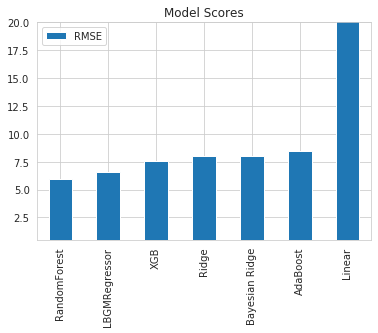

In [168]:
# Method 5 Replacing DEBTINC Null values
replacer = pd.read_csv("Bank_of_America_data.csv")
with_median = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='median')
)
median_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE"]
replacer[median_vars] = with_median.fit_transform(replacer[median_vars])
categ_vars = ["REASON", "JOB", "DEROG", "DELINQ", "NINQ", "CLNO", "YOJ"]
replacer[categ_vars] = replacer[categ_vars].astype(object)
most_frequent = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent')
)
most_frquent_value_vars = categ_vars
replacer[categ_vars] = most_frequent.fit_transform(replacer[categ_vars])
std_scaling = make_pipeline(
    StandardScaler()
)
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE"]
replacer[std_vars] = std_scaling.fit_transform(replacer[std_vars])

minmax_scaling = make_pipeline(
    MinMaxScaler()
)
minmax_vars = ["YOJ"]
replacer[minmax_vars] = minmax_scaling.fit_transform(replacer[minmax_vars])

# DEBTINC
df = replacer.copy()
#df.drop("BAD", axis=1, inplace=True)
df.dropna(subset=["DEBTINC"], inplace=True)
y_reg = df["DEBTINC"]
df.drop("DEBTINC", axis=1, inplace=True)
X_reg = df.copy()
# Converting Discrete columns to type str
categ_vars = ["REASON", "JOB", "DEROG", "DELINQ", "NINQ", "CLNO"]
X_reg[categ_vars] = X_reg[categ_vars].astype(str)
X_reg = pd.get_dummies(X_reg, drop_first=True)
#PCA
pca = PCA(n_components=102)
ss = StandardScaler()
ss.fit(X_reg)
X_scaled_reg = ss.transform(X_reg)
X_transformed_pca_reg = pca.fit_transform(X_scaled_reg)

def evaluate(train,target_train):
    results={}
    def test_model(clf):
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        mse = make_scorer(mean_squared_error)
        mse_val_score = cross_val_score(clf, train, target_train, cv=cv,scoring=mse)
        mse_val_score = np.sqrt(mse_val_score)
        scores=[mse_val_score.mean()]
        return scores
    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    clf = xgb.XGBRegressor()
    results["XGB"]=test_model(clf)
    clf = LGBMRegressor()
    results["LBGMRegressor"]=test_model(clf)
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["RMSE"] 
    results.sort_values('RMSE', inplace=True)
    #results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,20])
    return results

evaluate(X_reg,y_reg)
# Replacing
american5 = data.copy()
with_median = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='median')
)
median_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE"]
american5[median_vars] = with_median.fit_transform(american5[median_vars])
discrete_columns = ["DEROG", "DELINQ", "NINQ", "CLNO", "YOJ"]
american5[discrete_columns] = american5[discrete_columns].astype(object)
most_frequent = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent')
)
most_frquent_value_vars = discrete_columns
american5[discrete_columns] = most_frequent.fit_transform(american5[discrete_columns])
std_scaling = make_pipeline(
    StandardScaler()
)
std_vars = ["LOAN", "MORTDUE", "VALUE", "CLAGE"]
american5[std_vars] = std_scaling.fit_transform(american5[std_vars])

minmax_scaling = make_pipeline(
    MinMaxScaler()
)
minmax_vars = ["YOJ"]
american5[minmax_vars] = minmax_scaling.fit_transform(american5[minmax_vars])
# Encoding for regression model only
  # Job
american5["JOB"].fillna("Unspecified_Job", inplace=True)
  # Reason
american5["REASON"].fillna("Unspecified_Reason", inplace=True)
american5 = pd.get_dummies(american5).copy()

df = american5.copy()
df.drop("BAD", axis=1, inplace=True)
df.dropna(subset=["DEBTINC"], inplace=True)
y_debt = df["DEBTINC"]
df.drop("DEBTINC", axis=1, inplace=True)
X_debt = df.copy()

In [ ]:
reg = RandomForestRegressor()
reg.fit(X_debt, y_debt);

In [ ]:
for _,row in american5.iterrows():
    if np.isnan(row["DEBTINC"]):
        data  = pd.Series(np.array([row["LOAN"],row["MORTDUE"],row["VALUE"],row["YOJ"],row["DEROG"],row["DELINQ"],
                                   row["CLAGE"],row["NINQ"],row["CLNO"],row["REASON_DebtCon"],row["REASON_HomeImp"],row["REASON_Unspecified_Reason"],
                                   row["JOB_Mgr"],row["JOB_Office"],row["JOB_Other"],
                                   row["JOB_ProfExe"],row["JOB_Sales"],row["JOB_Self"], row["JOB_Unspecified_Job"]]))
        american5.loc[_,'DEBTINC'] = reg.predict([data])[0]

In [171]:
american5.isna().sum()

BAD                          0
LOAN                         0
MORTDUE                      0
VALUE                        0
YOJ                          0
DEROG                        0
DELINQ                       0
CLAGE                        0
NINQ                         0
CLNO                         0
DEBTINC                      0
REASON_DebtCon               0
REASON_HomeImp               0
REASON_Unspecified_Reason    0
JOB_Mgr                      0
JOB_Office                   0
JOB_Other                    0
JOB_ProfExe                  0
JOB_Sales                    0
JOB_Self                     0
JOB_Unspecified_Job          0
dtype: int64

In [172]:
correlation = american.corr()
correlation2 = american2.corr()
correlation3 = american3.corr()
correlation4 = american4.corr()
correlation5 = american5.corr()
matrices = [correlation, correlation2, correlation3, correlation4, correlation5]
for i in matrices:
    mat = np.matrix(i)
    print(str(sum(mat[:,1])))

[[1.82517567]]
[[1.82517567]]
[[1.82517567]]
[[1.62997875]]
[[1.83957799]]


In [ ]:
# We will use method 4
american4[discrete_columns] = american4[discrete_columns].astype(object)

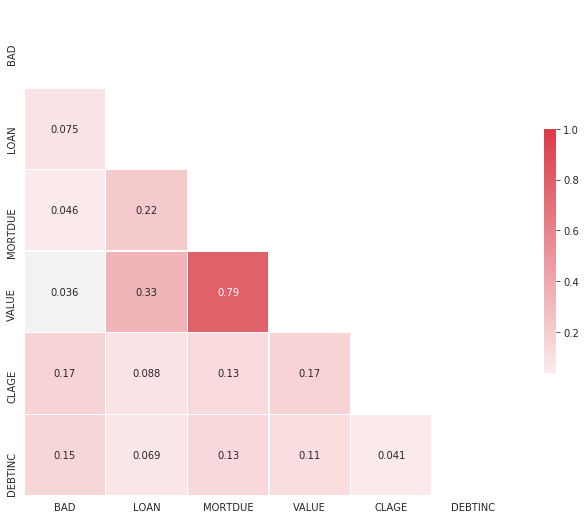

In [174]:
correlation4 = abs(american4.corr())
mask = np.zeros_like(correlation4, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation4, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [175]:
american4.head()

BAD      LOAN   MORTDUE     VALUE   REASON     JOB        YOJ DEROG DELINQ  \
0    1 -1.245902 -0.977478 -0.956113  HomeImp   Other   0.256098     0      0   
1    1 -1.229508  0.125658 -0.396751  HomeImp   Other   0.170732     0      2   
2    1 -1.213115 -1.286006 -1.381227  HomeImp   Other   0.097561     0      0   
3    1 -1.213115  0.000000  0.000000  DebtCon   Other          0     0      0   
4    0 -1.196721  0.818272  0.433484  HomeImp  Office  0.0731707     0      0   

      CLAGE NINQ CLNO  DEBTINC  
0 -0.720587    1    9      0.0  
1 -0.470370    0   14      0.0  
2 -0.218636    1   10      0.0  
3  0.000000    0   16      0.0  
4 -0.730000    0   14      0.0

In [176]:
american4 = pd.get_dummies(american4, drop_first=True)
american4.head()

BAD      LOAN   MORTDUE     VALUE     CLAGE  DEBTINC  REASON_HomeImp  \
0    1 -1.245902 -0.977478 -0.956113 -0.720587      0.0               1   
1    1 -1.229508  0.125658 -0.396751 -0.470370      0.0               1   
2    1 -1.213115 -1.286006 -1.381227 -0.218636      0.0               1   
3    1 -1.213115  0.000000  0.000000  0.000000      0.0               0   
4    0 -1.196721  0.818272  0.433484 -0.730000      0.0               1   

   JOB_Office  JOB_Other  JOB_ProfExe  JOB_Sales  JOB_Self  \
0           0          1            0          0         0   
1           0          1            0          0         0   
2           0          1            0          0         0   
3           0          1            0          0         0   
4           1          0            0          0         0   

   YOJ_0.002439024390243903  YOJ_0.004878048780487806  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   YOJ_0.006097560975609756  YOJ_0.007317073170731707  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   YOJ_0.009756097560975611  YOJ_0.012195121951219513  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   YOJ_0.014634146341463414  YOJ_0.017073170731707315  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   YOJ_0.01829268292682927  YOJ_0.019512195121951223  \
0                        0                         0   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   YOJ_0.021951219512195124  YOJ_0.024390243902439025  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   YOJ_0.03170731707317073  ...  CLNO_37.0  CLNO_38.0  CLNO_39.0  CLNO_40.0  \
0                        0  ...          0          0          0          0   
1                        0  ...          0          0          0          0   
2                        0  ...          0          0          0          0   
3                        0  ...          0          0          0          0   
4                        0  ...          0          0          0          0   

   CLNO_41.0  CLNO_42.0  CLNO_43.0  CLNO_44.0  CLNO_45.0  CLNO_46.0  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   CLNO_47.0  CLNO_48.0  CLNO_49.0  CLNO_50.0  CLNO_51.0  CLNO_52.0  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0

In [ ]:
X = american4.drop("BAD", axis=1)
y = american4["BAD"].copy()

In [178]:
pca = PCA(n_components=208)
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)
X_transformed_pca = pca.fit_transform(X_scaled)
pca_variance = pca.explained_variance_
explained_variance = pca.explained_variance_ratio_
sum(explained_variance.tolist()[0:172])

0.900974964627807

In [ ]:
def evaluate(algo, X_train, Y_train, cv):
    # One Pass
    model = algo.fit(X_train, Y_train)
    acc = round(model.score(X_train, Y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    recall_cv = round(metrics.recall_score(Y_train, train_pred) * 100, 2)
    precision_cv = round(metrics.precision_score(Y_train, train_pred) * 100, 2)
    f1_cv = round(metrics.f1_score(Y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv, recall_cv, precision_cv, f1_cv

def fit_ml_algo(algo, X_train, y_train, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    recall_cv = round(metrics.recall_score(Y_train, train_pred) * 100, 2)
    precision_cv = round(metrics.precision_score(Y_train, train_pred) * 100, 2)
    f1_cv = round(metrics.f1_score(Y_train, train_pred) * 100, 2)
    
    print("Model used :", algo.best_estimator_)
    return train_pred, acc, acc_cv, recall_cv, precision_cv, f1_cv

def fit_ml_algo_ne(algo, X_train, Y_train, cv):
    # One Pass
    model = algo.fit(X_train, Y_train)
    acc = round(model.score(X_train, Y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    recall_cv = round(metrics.recall_score(Y_train, train_pred) * 100, 2)
    precision_cv = round(metrics.precision_score(Y_train, train_pred) * 100, 2)
    f1_cv = round(metrics.f1_score(Y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv, recall_cv, precision_cv, f1_cv

In [ ]:
X_train = X_transformed_pca
y_train = y

In [181]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log, recall_cv_log, precision_cv_log, f1_cv_log = fit_ml_algo_ne(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Recall CV 10-Fold: %s" % recall_cv_log)
print("Precision CV 10-Fold: %s" % precision_cv_log)
print("F1 CV 10-Fold: %s" % f1_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: (1 Fold) 86.86
Accuracy CV 10-Fold: 83.76
Recall CV 10-Fold: 39.53
Precision CV 10-Fold: 65.37
F1 CV 10-Fold: 49.27
Running Time: 0:00:01.515939


In [182]:
# KNN
start_time = time.time()
knn_params = {'n_neighbors':list(range(1,15)), 'weights': ['distance', 'uniform']}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, knn_params, cv=5)
grid_search.fit(X_train, y_train)

train_pred_knn, acc_knn, acc_cv_knn, recall_cv_knn, precision_cv_knn, f1_cv_knn = fit_ml_algo_ne(grid_search.best_estimator_, X_train,y_train,10)
knn_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Recall CV 10-Fold: %s" % recall_cv_knn)
print("Precision CV 10-Fold: %s" % precision_cv_knn)
print("F1 CV 10-Fold: %s" % f1_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: (1 Fold) 100.0
Accuracy CV 10-Fold: 82.35
Recall CV 10-Fold: 20.77
Precision CV 10-Fold: 69.19
F1 CV 10-Fold: 31.95
Running Time: 0:07:00.740824


In [183]:
# Decision Tree 
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt, recall_cv_dt, precision_cv_dt, f1_cv_dt = fit_ml_algo_ne(DecisionTreeClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
dt_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Recall CV 10-Fold: %s" % recall_cv_dt)
print("Precision CV 10-Fold: %s" % precision_cv_dt)
print("F1 CV 10-Fold: %s" % f1_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: (1 Fold) 100.0
Accuracy CV 10-Fold: 77.75
Recall CV 10-Fold: 51.98
Precision CV 10-Fold: 45.01
F1 CV 10-Fold: 48.24
Running Time: 0:00:27.278321


In [184]:
# Random Forest
rf_params = {'n_estimators': list(range(1,15))
            }

grid_search = GridSearchCV(RandomForestClassifier(), rf_params, cv=10)
grid_search.fit(X_train, y_train)

print("Best params : ",grid_search.best_params_)
start_time = time.time()

train_pred_rf, acc_rf, acc_cv_rf, recall_cv_rf, precision_cv_rf, f1_cv_rf = fit_ml_algo_ne(grid_search.best_estimator_,X_train,y_train,10)

rf_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Recall CV 10-Fold: %s" % recall_cv_rf)
print("Precision CV 10-Fold: %s" % precision_cv_rf)
print("F1 CV 10-Fold: %s" % f1_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Best params :  {'n_estimators': 14}
Accuracy: (1 Fold) 99.48
Accuracy CV 10-Fold: 84.23
Recall CV 10-Fold: 38.1
Precision CV 10-Fold: 68.95
F1 CV 10-Fold: 49.08
Running Time: 0:00:15.511130


In [185]:
# SGDC
sgdc_params = {"loss": ["hinge", "log"], "penalty": ["l1", "l2"], "max_iter": [1,2,3,4,5]}

start_time = time.time()

grid_search = GridSearchCV(SGDClassifier(), sgdc_params, cv=5)
grid_search.fit(X_train, y_train)

print("Best params : ",grid_search.best_params_)

train_pred_sgdc, acc_sgdc, acc_cv_sgdc, recall_cv_sgdc, precision_cv_sgdc, f1_cv_sgdc  = fit_ml_algo_ne(grid_search.best_estimator_,X_train,y_train,10)

sgdc_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_sgdc)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgdc)
print("Recall CV 10-Fold: %s" % recall_cv_sgdc)
print("Precision CV 10-Fold: %s" % precision_cv_sgdc)
print("F1 CV 10-Fold: %s" % f1_cv_sgdc)
print("Running Time: %s" % datetime.timedelta(seconds=sgdc_time))

Best params :  {'loss': 'hinge', 'max_iter': 5, 'penalty': 'l1'}
Accuracy: (1 Fold) 81.31
Accuracy CV 10-Fold: 78.47
Recall CV 10-Fold: 42.89
Precision CV 10-Fold: 45.78
F1 CV 10-Fold: 44.29
Running Time: 0:00:03.913040


In [186]:
# GNB
train_pred_nb, acc_gnb, acc_cv_gnb, recall_cv_gnb, precision_cv_gnb, f1_cv_gnb  = fit_ml_algo_ne(GaussianNB(),X_train,y_train,10)
gnb_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_gnb)
print("Accuracy CV 10-Fold: %s" % acc_cv_gnb)
print("Recall CV 10-Fold: %s" % recall_cv_gnb)
print("Precision CV 10-Fold: %s" % precision_cv_gnb)
print("F1 CV 10-Fold: %s" % f1_cv_gnb)
print("Running Time: %s" % datetime.timedelta(seconds=gnb_time))

Accuracy: (1 Fold) 81.26
Accuracy CV 10-Fold: 81.07
Recall CV 10-Fold: 33.64
Precision CV 10-Fold: 54.13
F1 CV 10-Fold: 41.49
Running Time: 0:00:04.225864


In [187]:
# Linear SVC
lsvc_params = {"penalty": ["l2"],
                "loss": ["hinge", "squared_hinge"],
               "dual": [True],
               "C": [0.001,0.01,0.1,1,10]
            }

grid_search = GridSearchCV(LinearSVC(), lsvc_params, cv=5)
grid_search.fit(X_train, y_train)
print("Best params : ",grid_search.best_params_)

train_pred_lsvc, acc_lsvc, acc_cv_lsvc, recall_cv_lsvc, precision_cv_lsvc, f1_cv_lsvc = fit_ml_algo_ne(grid_search.best_estimator_,X_train,y_train,10)
lsvc_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_lsvc)
print("Accuracy CV 10-Fold: %s" % acc_cv_lsvc)
print("Recall CV 10-Fold: %s" % recall_cv_lsvc)
print("Precision CV 10-Fold: %s" % precision_cv_lsvc)
print("F1 CV 10-Fold: %s" % f1_cv_lsvc)
print("Running Time: %s" % datetime.timedelta(seconds=lsvc_time))

Best params :  {'C': 0.001, 'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2'}
Accuracy: (1 Fold) 86.29
Accuracy CV 10-Fold: 84.21
Recall CV 10-Fold: 36.42
Precision CV 10-Fold: 70.06
F1 CV 10-Fold: 47.92
Running Time: 0:01:37.562429


In [188]:
# XGBoost Classifier
start_time = time.time()
xgb_params = {"early_stopping_rounds": [1,2,5],
                "n_estimators": [5,10,15],
               "learning_rate": [0.001,0.03,0.05],
               "n_jobs": [0,1,2,5]
            }

grid_search = GridSearchCV(XGBClassifier(), xgb_params, cv=5)
grid_search.fit(X_train, y_train)
print("Best params : ",grid_search.best_params_)

train_pred_xgb, acc_xgb, acc_cv_xgb, recall_cv_xgb, precision_cv_xgb, f1_cv_xgb = fit_ml_algo_ne(grid_search.best_estimator_,X_train, y_train,10)
xgb_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_xgb)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb)
print("Recall CV 10-Fold: %s" % recall_cv_xgb)
print("Precision CV 10-Fold: %s" % precision_cv_xgb)
print("F1 CV 10-Fold: %s" % f1_cv_xgb)
print("Running Time: %s" % datetime.timedelta(seconds=xgb_time))

Best params :  {'early_stopping_rounds': 1, 'learning_rate': 0.05, 'n_estimators': 15, 'n_jobs': 0}
Accuracy: (1 Fold) 84.35
Accuracy CV 10-Fold: 82.6
Recall CV 10-Fold: 15.64
Precision CV 10-Fold: 84.55
F1 CV 10-Fold: 26.4
Running Time: 0:05:46.321265


In [189]:
from catboost import CatBoostClassifier, Pool, cv

train_pool = Pool(X_train, 
                  y_train)
catboost_model = CatBoostClassifier(iterations=2500,
                                    custom_loss=['F1', 'Precision', 'Recall', 'Accuracy'],
                                    loss_function='Logloss',
                                    #task_type="GPU",
                                    learning_rate=0.1,
                                    devices='0:1')
                                
catboost_model.fit(train_pool,plot=True)
catboost_model.best_score_

# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print(str(format(catboost_model.best_score_)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6454055	total: 77.2ms	remaining: 3m 13s
1:	learn: 0.6068657	total: 140ms	remaining: 2m 54s
2:	learn: 0.5710856	total: 200ms	remaining: 2m 46s
3:	learn: 0.5451946	total: 262ms	remaining: 2m 43s
4:	learn: 0.5159832	total: 332ms	remaining: 2m 45s
5:	learn: 0.4951851	total: 394ms	remaining: 2m 43s
6:	learn: 0.4755805	total: 458ms	remaining: 2m 43s
7:	learn: 0.4631841	total: 519ms	remaining: 2m 41s
8:	learn: 0.4518323	total: 591ms	remaining: 2m 43s
9:	learn: 0.4408475	total: 654ms	remaining: 2m 42s
10:	learn: 0.4299116	total: 715ms	remaining: 2m 41s
11:	learn: 0.4220542	total: 777ms	remaining: 2m 41s
12:	learn: 0.4141012	total: 846ms	remaining: 2m 41s
13:	learn: 0.4073431	total: 910ms	remaining: 2m 41s
14:	learn: 0.4022071	total: 972ms	remaining: 2m 40s
15:	learn: 0.3984001	total: 1.05s	remaining: 2m 42s
16:	learn: 0.3931697	total: 1.13s	remaining: 2m 45s
17:	learn: 0.3891835	total: 1.2s	remaining: 2m 44s
18:	learn: 0.3850371	total: 1.26s	remaining: 2m 44s
19:	learn: 0.3805128	t

In [ ]:
# Cross-validation accuracy metric
acc_cv_catboost = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
recall_cv_catboost = round(metrics.recall_score(y_train, train_pred) * 100, 2)
precision_cv_catboost = round(metrics.precision_score(y_train, train_pred) * 100, 2)
f1_cv_catboost = round(metrics.f1_score(y_train, train_pred) * 100, 2)

In [191]:
print("Accuracy CV 10-Fold: %s" % acc_cv_catboost)
print("Recall CV 10-Fold: %s" % recall_cv_catboost)
print("Precision CV 10-Fold: %s" % precision_cv_catboost)
print("F1 CV 10-Fold: %s" % f1_cv_catboost)

Accuracy CV 10-Fold: 82.2
Recall CV 10-Fold: 56.35
Precision CV 10-Fold: 55.28
F1 CV 10-Fold: 55.81


In [192]:
# Light GBM  Classifier
start_time = time.time()
lgbm_params = {
    'n_estimators': [100, 200, 300],
    """'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],"""
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

grid_search = GridSearchCV(LGBMClassifier(), lgbm_params, cv=5)
grid_search.fit(X_train, y_train)
print("Best params : ",grid_search.best_params_)

train_pred_lgbm, acc_lgbm, acc_cv_lgbm, recall_cv_lgbm, precision_cv_lgbm, f1_cv_lgbm  = fit_ml_algo_ne(grid_search.best_estimator_,X_train, y_train,10)
lgbm_time = (time.time() - start_time)
print("Accuracy: (1 Fold) %s" % acc_lgbm)
print("Accuracy CV 10-Fold: %s" % acc_cv_lgbm)
print("Recall CV 10-Fold: %s" % recall_cv_lgbm)
print("Precision CV 10-Fold: %s" % precision_cv_lgbm)
print("F1 CV 10-Fold: %s" % f1_cv_lgbm)
print("Running Time: %s" % datetime.timedelta(seconds=lgbm_time))

Best params :  {"'colsample_bytree': [0.7, 0.8],\n    'max_depth': [15,20,25],\n    'num_leaves': [50, 100, 200],\n    'reg_alpha': [1.1, 1.2, 1.3],\n    'reg_lambda': [1.1, 1.2, 1.3],\n    'min_split_gain': [0.3, 0.4],subsample": 0.7, 'n_estimators': 300, 'subsample_freq': 20}
Accuracy: (1 Fold) 100.0
Accuracy CV 10-Fold: 86.76
Recall CV 10-Fold: 50.55
Precision CV 10-Fold: 74.94
F1 CV 10-Fold: 60.37
Running Time: 0:11:05.583868


In [ ]:
cv_models_new = pd.DataFrame({
    'Model': ['KNN', 
              'Logistic Regression',
              'Gaussian Naive Bayes',
              'Stochastic Gradient Decent',
              'Linear SVC', 
              'Decision Tree',
              #'Gradient Boosting Trees',
              'XGBoost',
              'Random Forest',
              "LGBM",
              "Catboost",
              "Catboost_1F"
              ],
    'Accuracy': [
        acc_cv_knn,
        acc_cv_log,
        acc_cv_gnb,
        acc_cv_sgdc,
        acc_cv_lsvc,
        acc_cv_dt,
        #acc_cv_gbc,
        acc_cv_xgb,
        acc_cv_rf,
        acc_cv_lgbm,
        acc_cv_catboost,
        acc_catboost
    ], 'Precision': [
        precision_cv_knn,
        precision_cv_log,
        precision_cv_gnb,
        precision_cv_sgdc,
        precision_cv_lsvc,
        precision_cv_dt,
        #precision_cv_gbc,
        precision_cv_xgb,
        precision_cv_rf,
        precision_cv_lgbm,
        precision_cv_catboost,
        precision_catboost
    ], 'Recall': [
        recall_cv_knn,
        recall_cv_log,
        recall_cv_gnb,
        recall_cv_sgdc,
        recall_cv_lsvc,
        recall_cv_dt,
        #recall_cv_gbc,
        recall_cv_xgb,
        recall_cv_rf,
        recall_cv_lgbm,
        recall_cv_catboost,
        recall_catboost
    ], 'F1-Score' : [
        f1_cv_knn,
        f1_cv_log,
        f1_cv_gnb,
        f1_cv_sgdc,
        f1_cv_lsvc,
        f1_cv_dt,
        #f1_cv_gbc,
        f1_cv_xgb,
        f1_cv_rf,
        f1_cv_lgbm,
        f1_cv_catboost,
        f1_catboost
    ]})

In [194]:
print('---Cross-validation Scores---')
cv_models_new.sort_values(by='Precision', ascending=False)

---Cross-validation Scores---


Model   Accuracy  Precision     Recall   F1-Score
10                 Catboost_1F  99.647651  98.407376  99.915896  99.123905
6                      XGBoost  82.600000  84.550000  15.640000  26.400000
8                         LGBM  86.760000  74.940000  50.550000  60.370000
4                   Linear SVC  84.210000  70.060000  36.420000  47.920000
0                          KNN  82.350000  69.190000  20.770000  31.950000
7                Random Forest  84.230000  68.950000  38.100000  49.080000
1          Logistic Regression  83.760000  65.370000  39.530000  49.270000
9                     Catboost  82.200000  55.280000  56.350000  55.810000
2         Gaussian Naive Bayes  81.070000  54.130000  33.640000  41.490000
3   Stochastic Gradient Decent  78.470000  45.780000  42.890000  44.290000
5                Decision Tree  77.750000  45.010000  51.980000  48.240000

In [195]:
cv_models.sort_values(by='Precision', ascending=False)

Model   Accuracy  Precision     Recall   F1-Score
10                 Catboost_1F  99.647651  98.407376  99.915896  99.123905
6                      XGBoost  82.840000  69.480000  24.890000  36.660000
8                         LGBM  85.700000  67.460000  54.750000  60.450000
1          Logistic Regression  83.070000  66.420000  30.610000  41.910000
4                   Linear SVC  82.600000  65.570000  26.910000  38.160000
7                Random Forest  84.560000  63.380000  53.570000  58.070000
0                          KNN  81.950000  61.190000  25.990000  36.480000
9                     Catboost  82.200000  55.280000  56.350000  55.810000
2         Gaussian Naive Bayes  81.190000  54.390000  35.410000  42.890000
5                Decision Tree  79.850000  49.570000  57.950000  53.430000
3   Stochastic Gradient Decent  74.030000  37.020000  43.060000  39.810000